In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filePath = '/content/TimeSeries (1).csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(filePath)


In [ ]:
df.describe()

,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C
count,29448.000000,29448.00000,17836.000000,17884.000000,17884.000000,13939.000000,1047.000000,512.000000,4142.000000,20114.000000,1746.000000,1599.000000,19323.000000,12908.000000
mean,150729.435208,0.04401,77.389549,57.381626,118.825263,11.386311,1.453486,91.741797,125.361661,86.259471,10.403110,143.520951,97.071236,37.239037
std,29351.498391,0.20512,14.705526,11.362053,21.895607,5.191388,1.319426,22.899203,39.294528,14.466417,1.481641,65.167057,3.134375,1.859348
min,100059.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,26.000000,33.000000,4.500000,26.000000,0.500000,0.000000
25%,125858.000000,0.00000,68.000000,50.000000,104.000000,8.000000,0.800000,76.750002,101.000000,77.000000,9.400000,99.500000,96.000000,37.000000
50%,151246.000000,0.00000,75.000000,56.000000,116.000000,11.000000,1.100000,88.800003,120.000000,86.000000,10.300000,131.000000,97.000000,37.400002
75%,175905.000000,0.00000,84.000000,64.000000,131.000000,14.000000,1.500000,104.500000,142.000000,95.000000,11.200000,174.000000,99.000000,37.799999
max,199998.000000,1.00000,287.000000,155.000000,227.000000,48.000000,12.500000,208.199997,600.000000,208.000000,17.100000,689.000000,100.000000,39.700001


1126 patients recorded in dataset.

In [ ]:
patientID = df['PatientID']
patients = len(set(patientID))
patients

1126

Outcome class: Mortality
patient distribution: 1077 patients in class 0; 49 in class 1. The dataset is imbalanced, i.e., there is significantly more data for class 0 patients compared to class 1.

In [ ]:
distribution = df.groupby('Mortality')['PatientID'].nunique()
distribution

Mortality
0    1077
1      49
Name: PatientID, dtype: int64

variable: PatientID 
              count           mean           std       min       25%       50%  \
Mortality                                                                       
0          28152.0  150926.738278  29424.739351  100059.0  126256.0  151821.0   
1           1296.0  146443.574074  27374.574776  101579.0  125320.0  144152.0   

                75%       max  
Mortality                      
0          175905.0  199998.0  
1          173524.0  196854.0  
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
variable: Mortality 
              count  mean  std  min  25%  50%  75%  max
Mortality                                             
0          28152.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1           1296.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
variable: MeanBP 
              count       mean        std   min   25%   50%   75%    max
Mortality                                                              
0          17197.0  

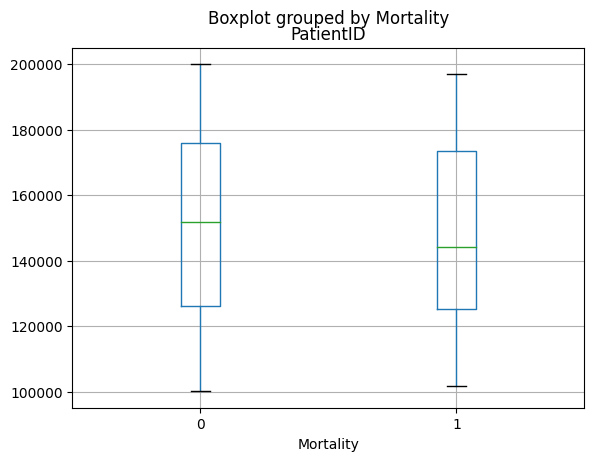

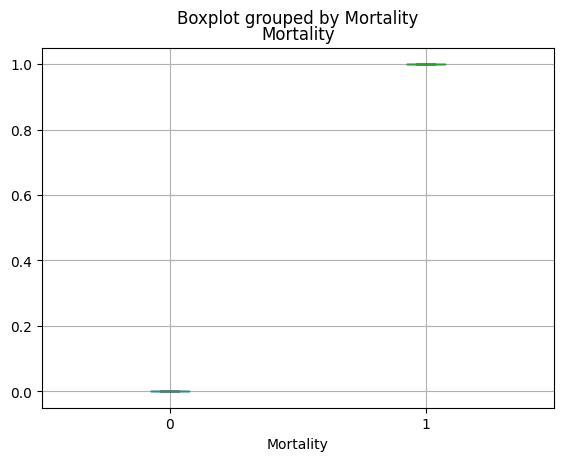

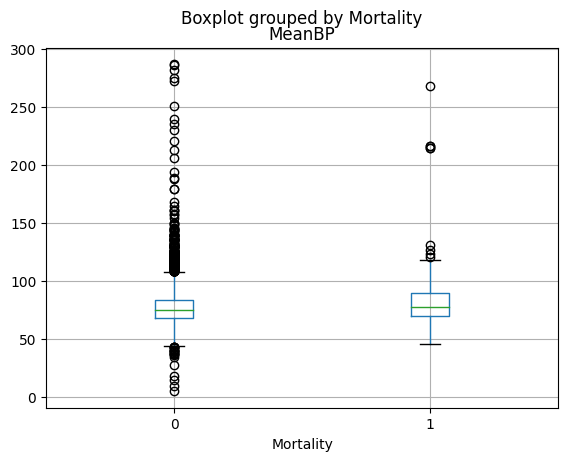

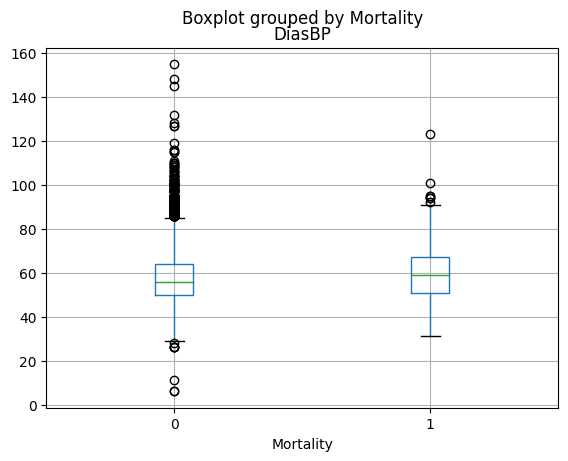

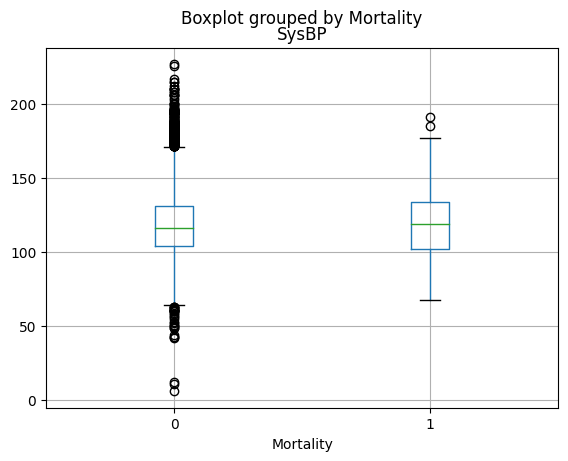

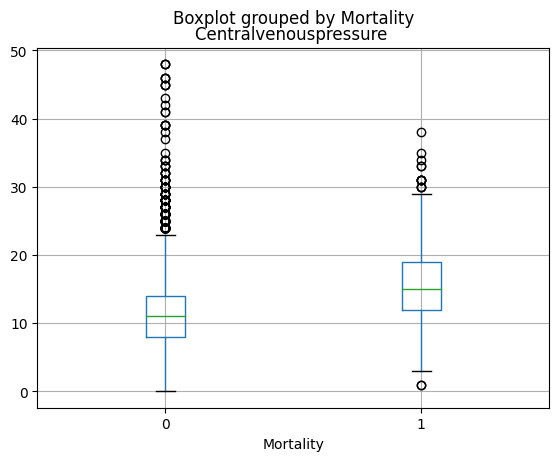

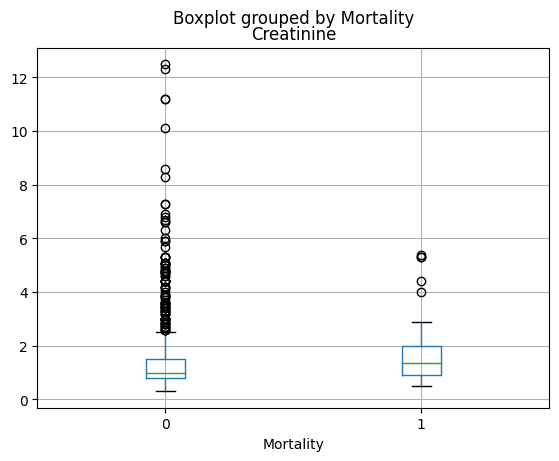

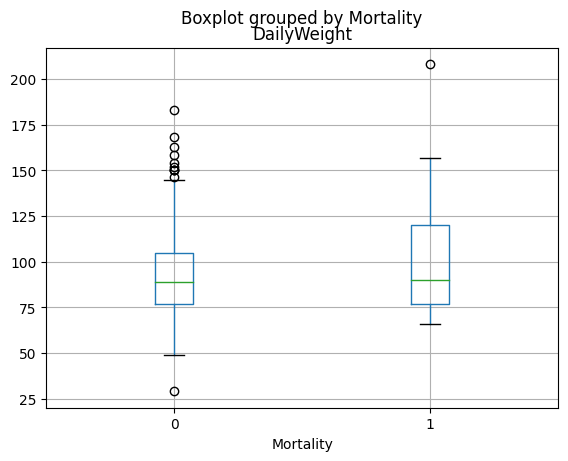

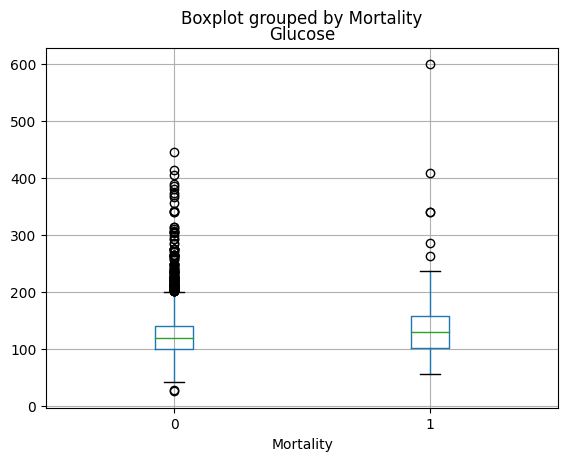

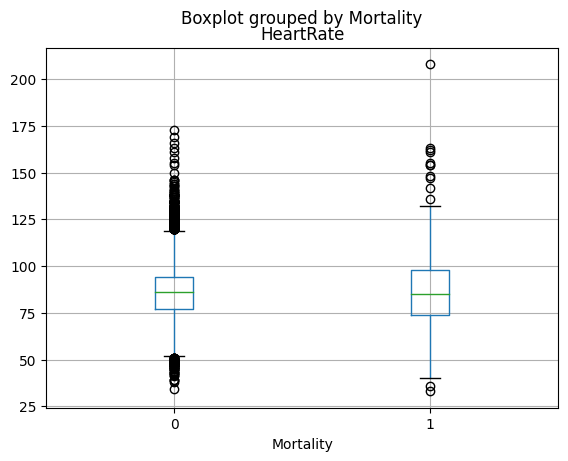

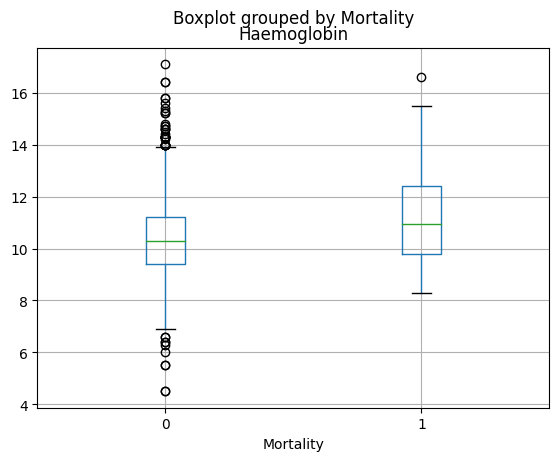

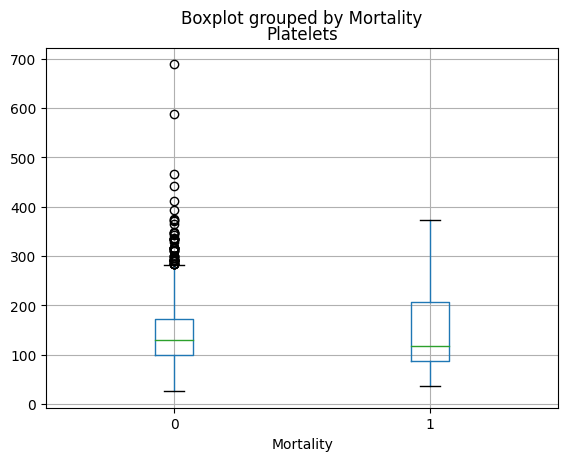

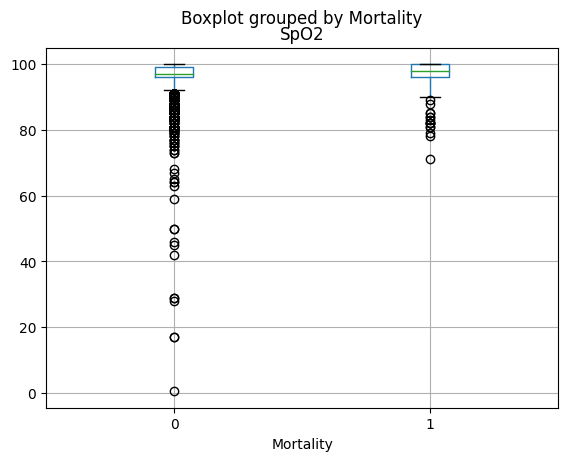

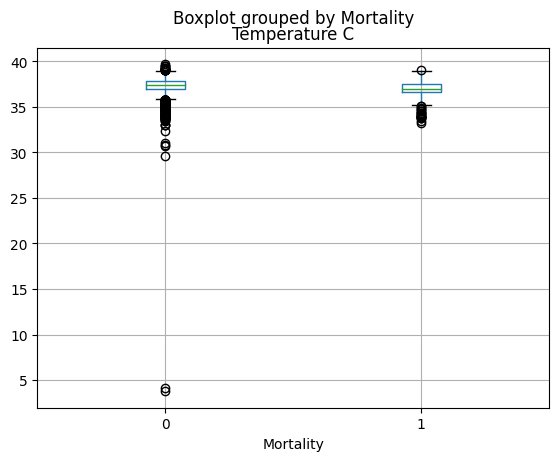

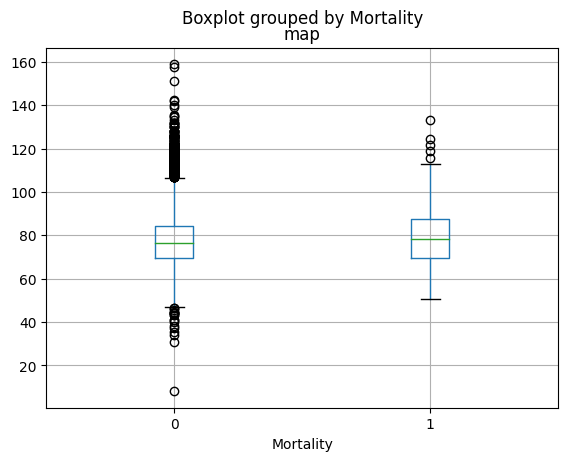

In [ ]:
for var in df.columns:
  df.boxplot(column=[var], by='Mortality')
  print('variable:', var,'\n', df.groupby('Mortality')[var].describe())
  print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')


Q.Use	 your	 visualisations	 to	 identify	 any	 nonsensical/impossible	values,	justifying your choice	and	course of	actions.

A. Temperature in C cannot be close to 0 degrees for a human. According to box plot, there are 2 data points where the temperature is around 0 degrees.Furthermore, both box plots and 'df.describe' shows that some variables have 0 as their minimmum values which cannot be possible ( daily weight, SPO2, mean bp, dias and sys bp). Therefore, we need to replace these missing (not showing as missing) values with NaN

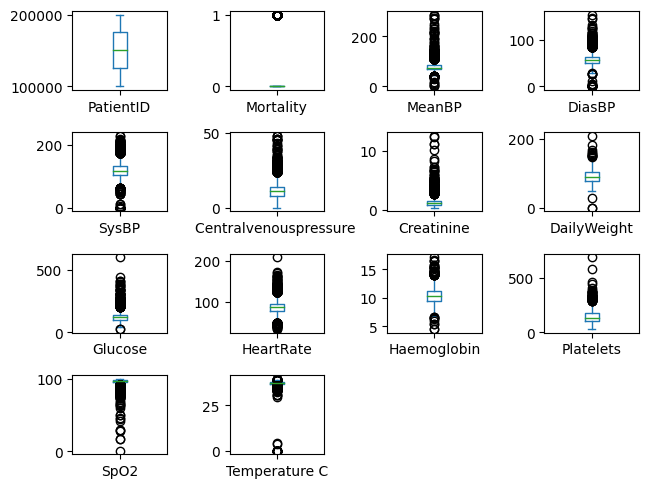

In [ ]:
columns_to_plot = ['PatientID', 'Mortality', 'MeanBP', 'DiasBP', 'SysBP',
       'Centralvenouspressure ', 'Creatinine', 'DailyWeight', 'Glucose',
       'HeartRate', 'Haemoglobin', 'Platelets', 'SpO2', 'Temperature C']
plot_data  = df.loc[:,columns_to_plot]
plot_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [ ]:
df.describe()

,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C
count,29448.000000,29448.00000,17836.000000,17884.000000,17884.000000,13939.000000,1047.000000,512.000000,4142.000000,20114.000000,1746.000000,1599.000000,19323.000000,12908.000000
mean,150729.435208,0.04401,77.389549,57.381626,118.825263,11.386311,1.453486,91.741797,125.361661,86.259471,10.403110,143.520951,97.071236,37.239037
std,29351.498391,0.20512,14.705526,11.362053,21.895607,5.191388,1.319426,22.899203,39.294528,14.466417,1.481641,65.167057,3.134375,1.859348
min,100059.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,26.000000,33.000000,4.500000,26.000000,0.500000,0.000000
25%,125858.000000,0.00000,68.000000,50.000000,104.000000,8.000000,0.800000,76.750002,101.000000,77.000000,9.400000,99.500000,96.000000,37.000000
50%,151246.000000,0.00000,75.000000,56.000000,116.000000,11.000000,1.100000,88.800003,120.000000,86.000000,10.300000,131.000000,97.000000,37.400002
75%,175905.000000,0.00000,84.000000,64.000000,131.000000,14.000000,1.500000,104.500000,142.000000,95.000000,11.200000,174.000000,99.000000,37.799999
max,199998.000000,1.00000,287.000000,155.000000,227.000000,48.000000,12.500000,208.199997,600.000000,208.000000,17.100000,689.000000,100.000000,39.700001


number of intervals not the same across patients. Average number of intervals: 26.153

In [ ]:
patient_counts={}

for id in df['PatientID']:
  if id in patient_counts:
    patient_counts[id]+=1
  else:
    patient_counts[id]=1


for patient in patient_counts:
  if patient_counts[patient] != 24:
    print(patient_counts[patient])




In [ ]:
average = sum(patient_counts.values()) / len(patient_counts)
average

26.152753108348136

<Axes: >

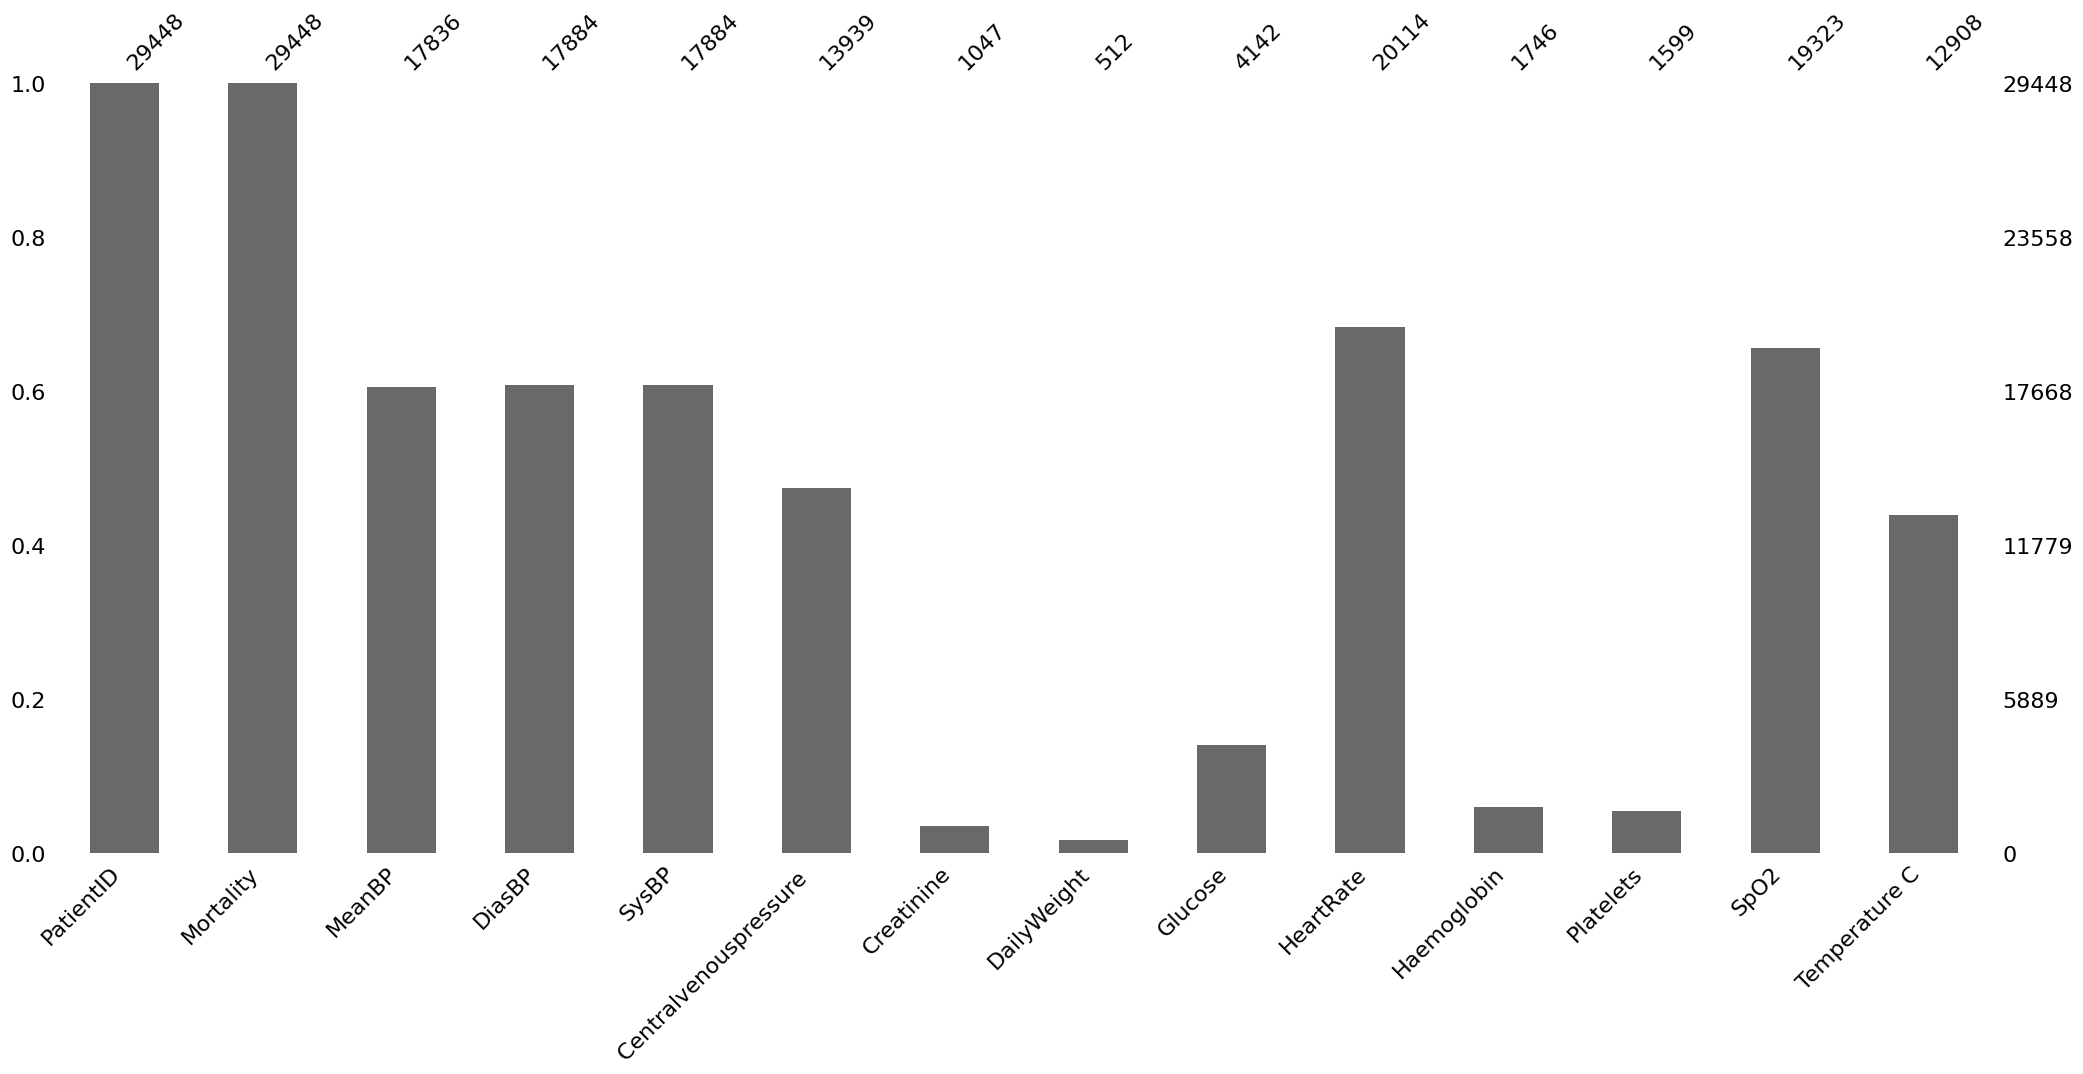

In [ ]:
# Package imports
import missingno as msno
%matplotlib inline

msno.bar(df)

In [ ]:
df.loc[df["Temperature C"] == 0.0, "Temperature C"] = np.NAN
df.loc[df["SpO2"] == 0.0, "SpO2"] = np.NAN
df.loc[df["DailyWeight"] == 0.0, "DailyWeight"] = np.NAN
df.loc[df["SysBP"] == 0.0, "SysBP"] = np.NAN
df.loc[df["DiasBP"] == 0.0, "DiasBP"] = np.NAN
df.loc[df["MeanBP"] == 0.0, "MeanBP"] = np.NAN


the below plot confirms that variables with values zero have been replaced by NaN (daily weight vlaues dropped from 512 to 510).

<Axes: >

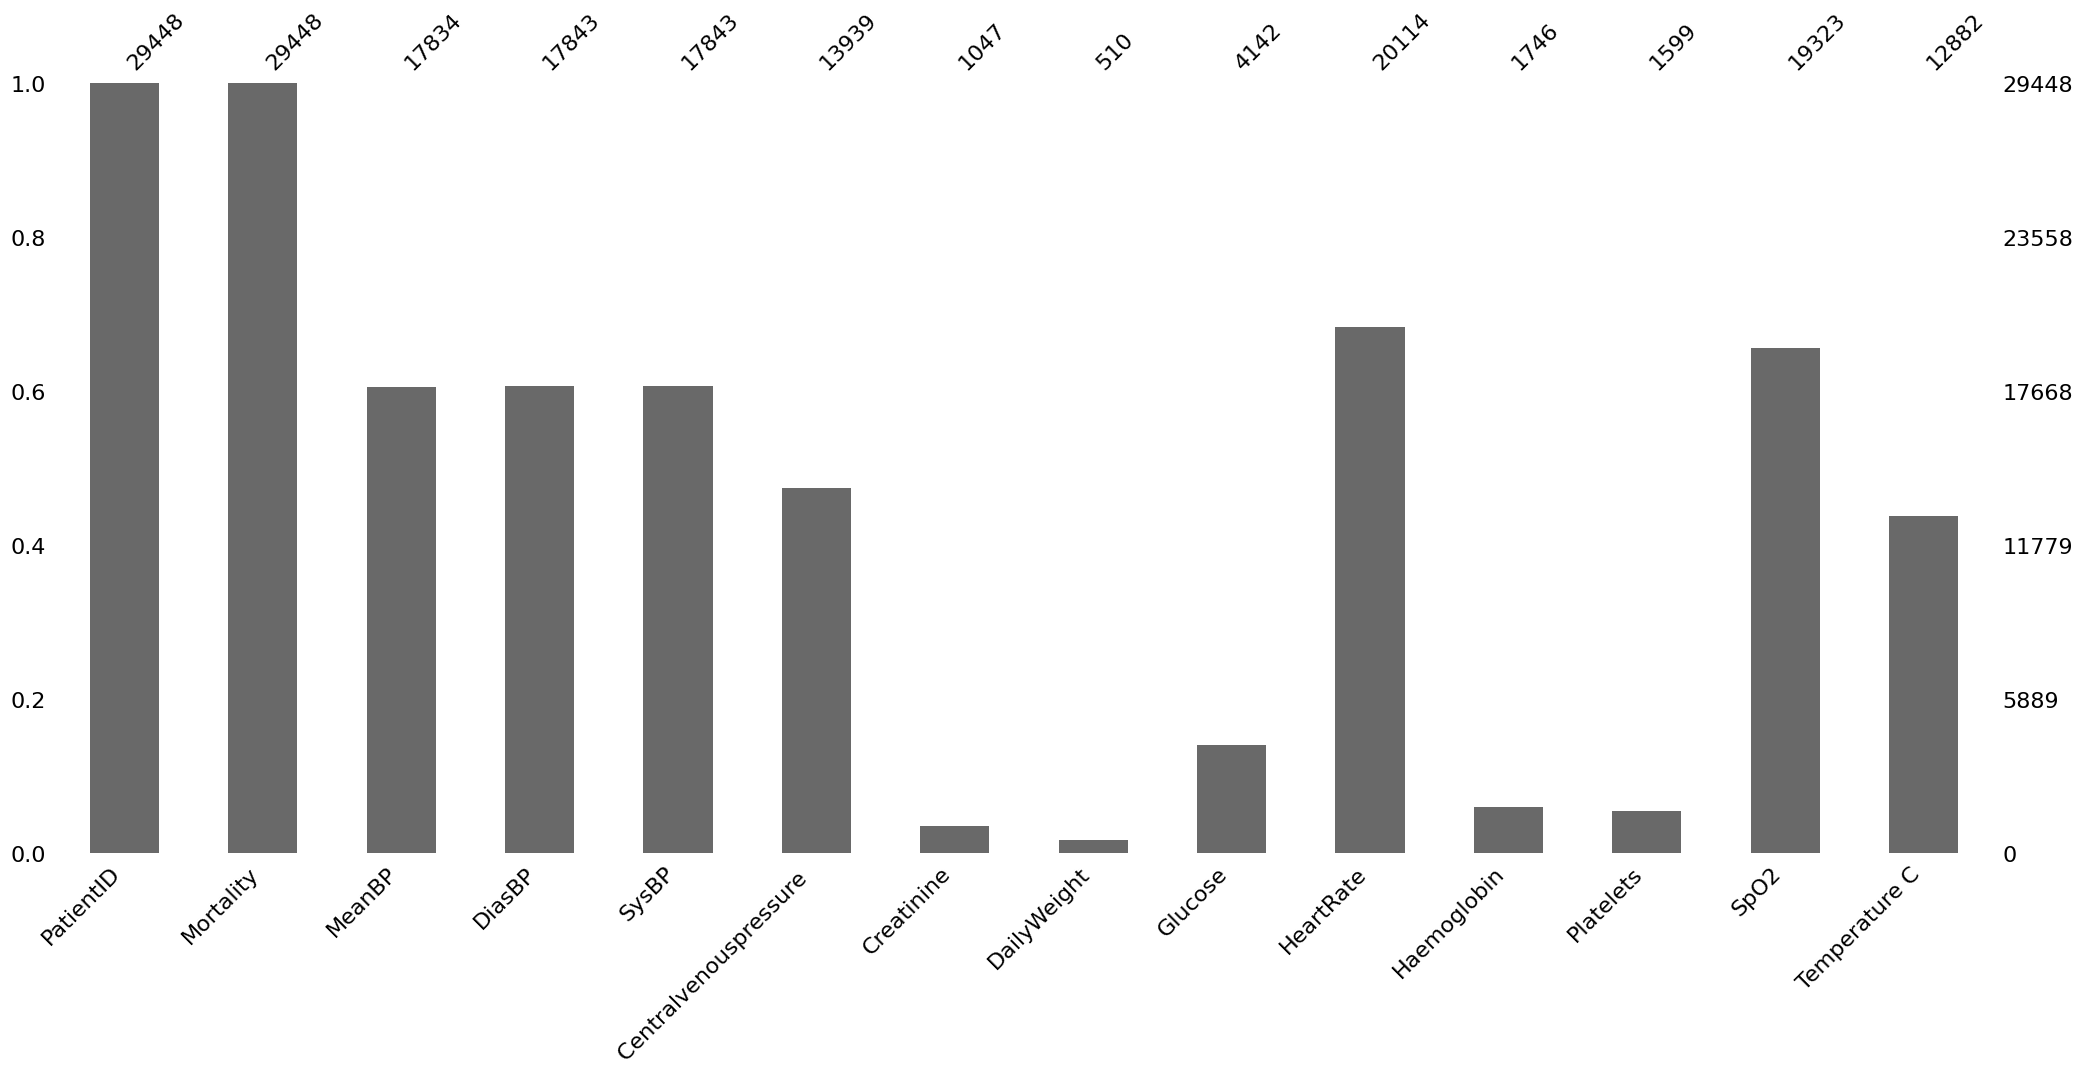

In [ ]:
msno.bar(df)

General missingness across all variables could be attributed to the fact that the data collected is for the purposes of clinical insights for patients' health improvement and not research. The measurements recorded at the time of patient admission may not have been deemed necessary to note down for future use, primarily because it will most likely provide no clinical relevance. Data could have also been lost when logging it in a database.

Some measurements are not mandated to be taken on a hourly basis unlike others. These measurements may not fluctuate as much on an hourly basis (eg daily weight). All these measurements may be taken for patients with a similar medical condition profile. Some of these measurements might fluctuate more over the course of the day unlike others, depending on the medical condition, therefore requiring more regular tests.

Creatinine tests are usually conducted once after collecting urine over a 24 hour duration, therefore, explaining the 96.44% missinginess. Blood pressure levels may have been logged only if patient's condition is more severe. CVP may not be part of routine monitoring as its intravenous and can be more expensive to conduct.

In [ ]:
# Calculate the total missing values in each column
missing_values_count = df.isnull().sum()

# Calculate the missing data rates
missing_data_rates = (missing_values_count / len(df)) * 100

print("Missing Data Rates:")
print(missing_data_rates)


Missing Data Rates:
PatientID                  0.000000
Mortality                  0.000000
MeanBP                    39.439011
DiasBP                    39.408449
SysBP                     39.408449
Centralvenouspressure     52.665716
Creatinine                96.444580
DailyWeight               98.268134
Glucose                   85.934529
HeartRate                 31.696550
Haemoglobin               94.070905
Platelets                 94.570090
SpO2                      34.382641
Temperature C             56.255094
dtype: float64


Based on the assumption that class 1 patients are dead and class 0 are alive:

We observe that rate of missingness is higher across all variables for patients who are alive compared to those who have passed on. This could be due to the difference in intensity of treatment. Patients in class 1 may have been critical at the time of their hospital stay, leading to increased frequency and routine check-ups/measurements taken compared to those not so critical/relatively healthier (class 0).

There is still some missing values across class 0 variables. This could be attributed to untimely death of the patient, resulting in abrupt conclusion to medical tests.  


In [ ]:
# Calculate the total missing values in each column (separating them by class 1 and 0)
df_1 = df[df["Mortality"]==1]
df_0= df[df["Mortality"]==0]

missing_values_count_1 = df_1.isnull().sum()
missing_values_count_0 = df_0.isnull().sum()

# Calculate the missing data rates
missing_data_rates_1 = (missing_values_count_1 / len(df)) * 100
missing_data_rates_0 = (missing_values_count_0 / len(df)) * 100

print("Missing Data Rates for those who passed on:")
print(missing_data_rates_1)


print("Missing Data Rates for those alive:")
print(missing_data_rates_0)

Missing Data Rates for those who passed on:
PatientID                 0.000000
Mortality                 0.000000
MeanBP                    2.237843
DiasBP                    2.234447
SysBP                     2.234447
Centralvenouspressure     2.696278
Creatinine                4.285520
DailyWeight               4.356832
Glucose                   4.051209
HeartRate                 2.010323
Haemoglobin               4.115729
Platelets                 4.119125
SpO2                      2.183510
Temperature C             2.720049
dtype: float64
Missing Data Rates for those alive:
PatientID                  0.000000
Mortality                  0.000000
MeanBP                    37.201168
DiasBP                    37.174002
SysBP                     37.174002
Centralvenouspressure     49.969438
Creatinine                92.159060
DailyWeight               93.911301
Glucose                   81.883320
HeartRate                 29.686227
Haemoglobin               89.955175
Platelets          

The dataset's missingness is of type MAR  (missing at random). As we can see above, missingness is dependent on observed variable mortality.

Q3.

In [ ]:
def map(sysbp, diasbp):
  return (sysbp + (2*diasbp))/3

df['map'] = map(df['SysBP'], df['DiasBP'])

print(df['map'])

0              NaN
1        78.666667
2        81.333333
3        77.000000
4        98.666667
           ...    
29443          NaN
29444          NaN
29445          NaN
29446          NaN
29447          NaN
Name: map, Length: 29448, dtype: float64


In [ ]:
# Create a new DataFrame with an additional 'hours' column
df_with_hour = df.copy()

# Group by 'PatientID' and add 1 to each 'Hour' value within each group
df_with_hour['hour'] = df.groupby('PatientID').cumcount() + 1

# Display the resulting DataFrame
print(df_with_hour['hour'])

0         1
1         2
2         3
3         4
4         5
         ..
29443    20
29444    21
29445    22
29446    23
29447    24
Name: hour, Length: 29448, dtype: int64


In [ ]:
df_with_hour[df_with_hour['PatientID']==129004]['hour']

576     1
577     2
578     3
579     4
580     5
581     6
582     7
583     8
584     9
585    10
586    11
587    12
588    13
589    14
590    15
591    16
592    17
593    18
594    19
595    20
596    21
597    22
598    23
599    24
Name: hour, dtype: int64

In [ ]:
# Identify patients with any NaN values in the 'map' column
patients_with_nan = df_with_hour[df_with_hour['map'].isna()]['PatientID'].unique()

# Drop rows for patients with NaN values in the 'map' column
df_complete_case = df_with_hour[~df_with_hour['PatientID'].isin(patients_with_nan)]

In [ ]:
df_complete_case

,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C,map,hour
48,129669,0,106.0,85.0,156.0,19.0,NaN,NaN,NaN,106.0,NaN,NaN,91.0,37.900002,108.666667,1
49,129669,0,87.0,79.0,139.0,12.0,NaN,NaN,NaN,106.0,NaN,NaN,86.0,37.900002,99.000000,2
50,129669,0,94.0,72.0,141.0,18.0,NaN,NaN,107.0,106.0,11.0,NaN,96.0,38.000000,95.000000,3
51,129669,0,95.0,74.0,142.0,11.0,NaN,NaN,NaN,104.0,NaN,NaN,95.0,38.000000,96.666667,4
52,129669,0,110.0,80.0,170.0,7.0,NaN,NaN,NaN,102.0,NaN,NaN,98.0,38.000000,110.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29395,129605,0,76.0,59.0,113.0,9.0,NaN,NaN,NaN,80.0,NaN,NaN,100.0,37.299999,77.000000,20
29396,129605,0,56.0,40.0,96.0,10.0,NaN,NaN,NaN,80.0,NaN,NaN,96.0,NaN,58.666667,21
29397,129605,0,61.0,45.0,95.0,NaN,NaN,NaN,259.0,80.0,NaN,NaN,89.0,NaN,61.666667,22
29398,129605,0,61.0,45.0,91.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,94.0,NaN,60.333333,23


In [ ]:
# Filter the DataFrame to include only patients with at least 24 data points
patient_counts = df_complete_case['PatientID'].value_counts()
patients_with_24_points = patient_counts[patient_counts == 24].index

# Create a new DataFrame with only patients having at least 24 data points
df_filtered = df_complete_case[df_complete_case['PatientID'].isin(patients_with_24_points)]

# Display the filtered DataFrame
print(df_filtered)

       PatientID  Mortality  MeanBP  DiasBP  SysBP  Centralvenouspressure   \
48        129669          0   106.0    85.0  156.0                    19.0   
49        129669          0    87.0    79.0  139.0                    12.0   
50        129669          0    94.0    72.0  141.0                    18.0   
51        129669          0    95.0    74.0  142.0                    11.0   
52        129669          0   110.0    80.0  170.0                     7.0   
...          ...        ...     ...     ...    ...                     ...   
29395     129605          0    76.0    59.0  113.0                     9.0   
29396     129605          0    56.0    40.0   96.0                    10.0   
29397     129605          0    61.0    45.0   95.0                     NaN   
29398     129605          0    61.0    45.0   91.0                     NaN   
29399     129605          0    55.0    40.0   84.0                     NaN   

       Creatinine  DailyWeight  Glucose  HeartRate  Haemoglobin

In [ ]:
# Randomly select 25 patients from df_filtered
selected_patients = df_filtered['PatientID'].sample(n=25, random_state=42)

In [ ]:
selected_patients

9812     110438
7846     156162
1844     135796
8907     146404
18532    100059
24348    161829
10632    141229
17473    175153
16583    140396
7099     143476
1832     135796
23054    191341
3255     190262
21042    199280
29325    162696
23675    175769
29397    129605
25537    154583
20370    134976
22625    103299
28894    152407
27536    113401
24940    109562
1826     135796
16030    149918
Name: PatientID, dtype: int64

In [ ]:
df_filtered

,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C,map,hour
48,129669,0,106.0,85.0,156.0,19.0,NaN,NaN,NaN,106.0,NaN,NaN,91.0,37.900002,108.666667,1
49,129669,0,87.0,79.0,139.0,12.0,NaN,NaN,NaN,106.0,NaN,NaN,86.0,37.900002,99.000000,2
50,129669,0,94.0,72.0,141.0,18.0,NaN,NaN,107.0,106.0,11.0,NaN,96.0,38.000000,95.000000,3
51,129669,0,95.0,74.0,142.0,11.0,NaN,NaN,NaN,104.0,NaN,NaN,95.0,38.000000,96.666667,4
52,129669,0,110.0,80.0,170.0,7.0,NaN,NaN,NaN,102.0,NaN,NaN,98.0,38.000000,110.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29395,129605,0,76.0,59.0,113.0,9.0,NaN,NaN,NaN,80.0,NaN,NaN,100.0,37.299999,77.000000,20
29396,129605,0,56.0,40.0,96.0,10.0,NaN,NaN,NaN,80.0,NaN,NaN,96.0,NaN,58.666667,21
29397,129605,0,61.0,45.0,95.0,NaN,NaN,NaN,259.0,80.0,NaN,NaN,89.0,NaN,61.666667,22
29398,129605,0,61.0,45.0,91.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,94.0,NaN,60.333333,23


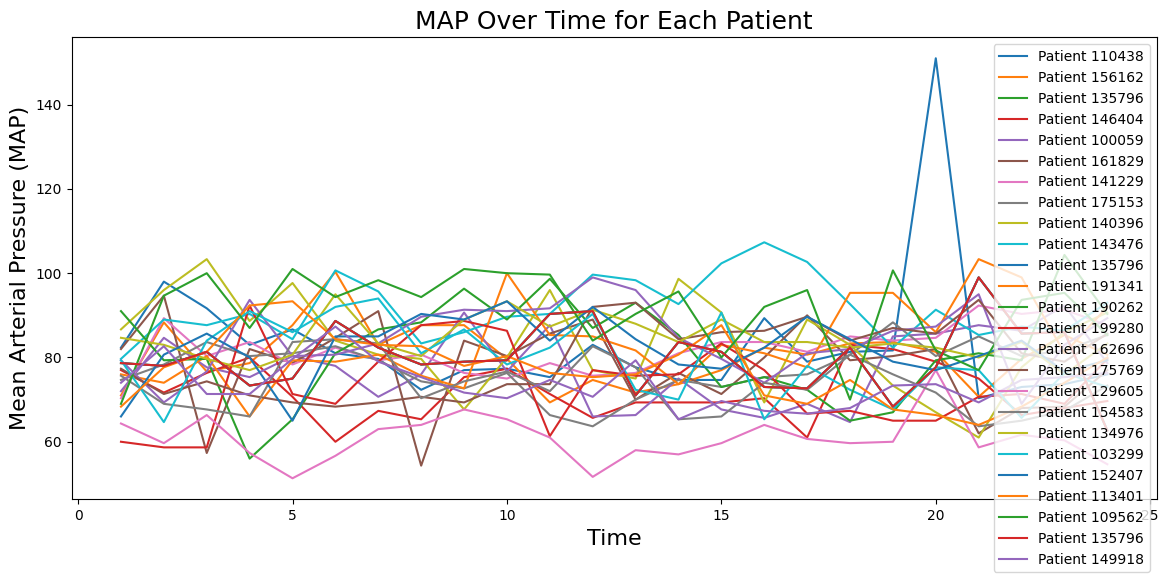

In [ ]:

# Get unique patient IDs
unique_patient_ids = df_filtered['PatientID'].unique()
selected_patients = df_filtered['PatientID'].sample(n=25, random_state=42)
# Plot MAP over time for each patient
plt.figure(figsize=(14, 6))

for patient_id in selected_patients:
    # Filter data for the current patient
    patient_data = df_filtered[df_filtered['PatientID'] == patient_id]

    # Set x equal to the hours
    x_hr = patient_data['hour']

    # Set y equal to the Mean Arterial Pressure (MAP)
    y_map = patient_data['map']

    # Plot time against MAP
    plt.plot(x_hr, y_map, label=f'Patient {patient_id}')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Mean Arterial Pressure (MAP)', fontsize=16)
plt.title('MAP Over Time for Each Patient', fontsize=18)
plt.legend()
plt.show()

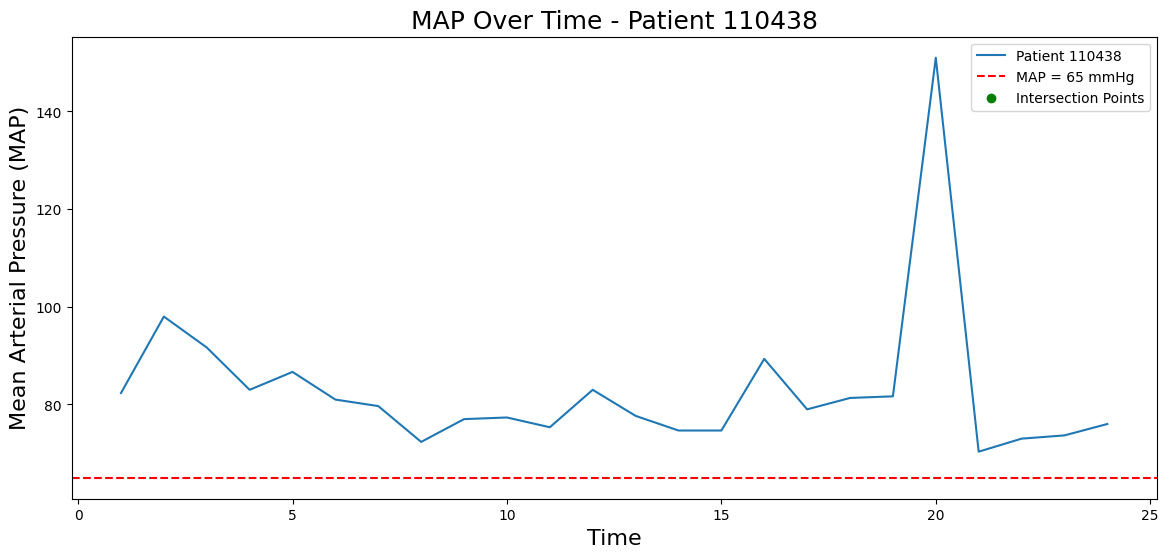

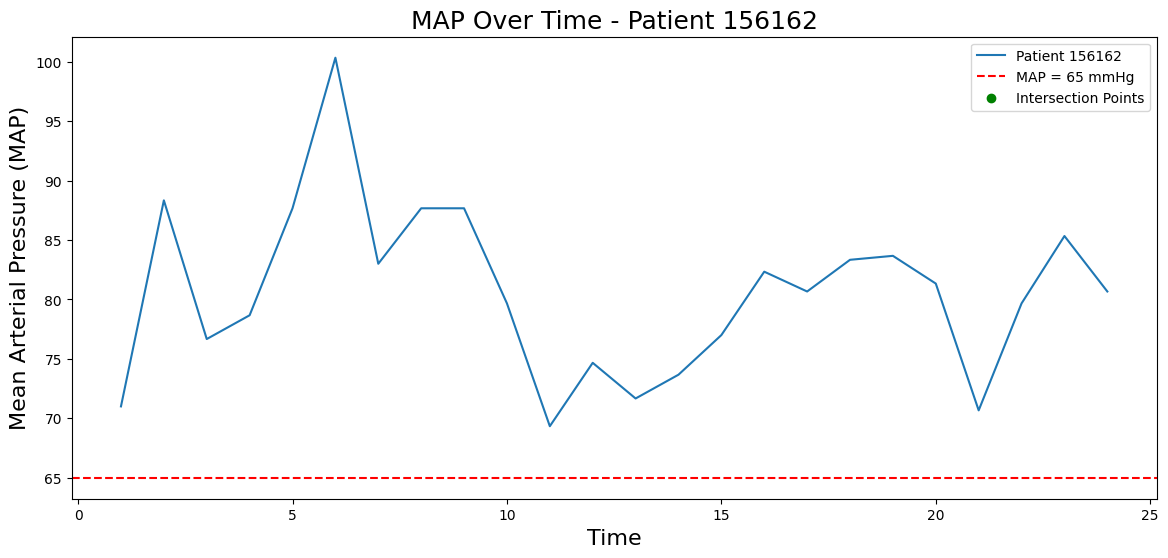

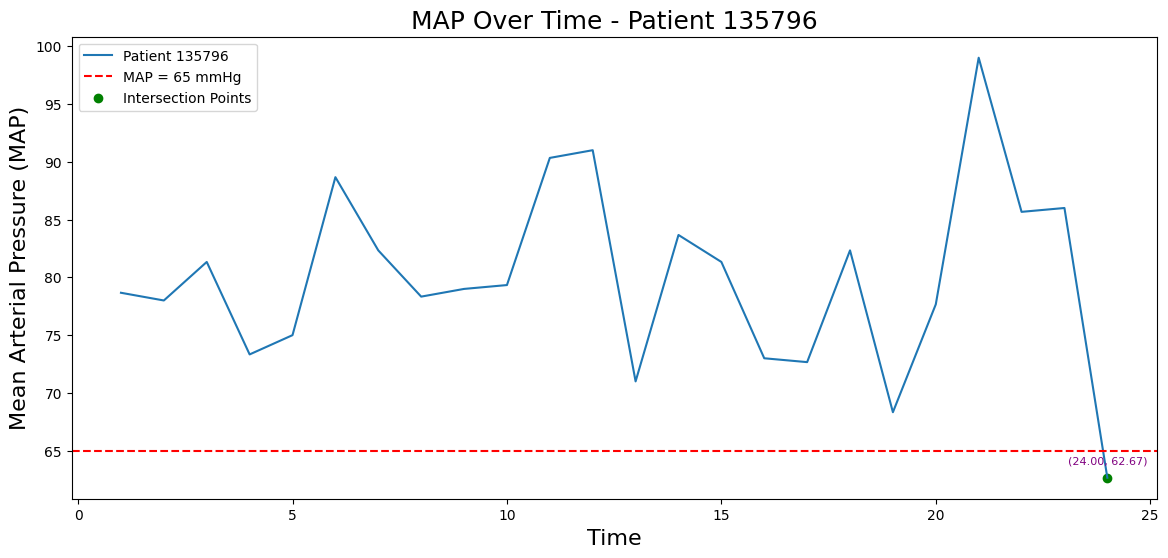

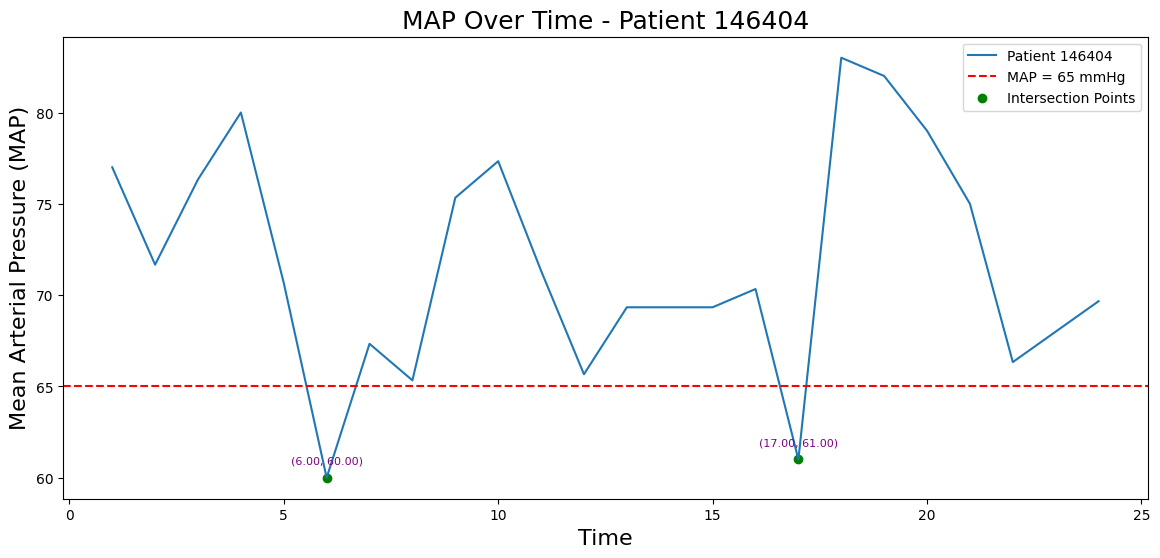

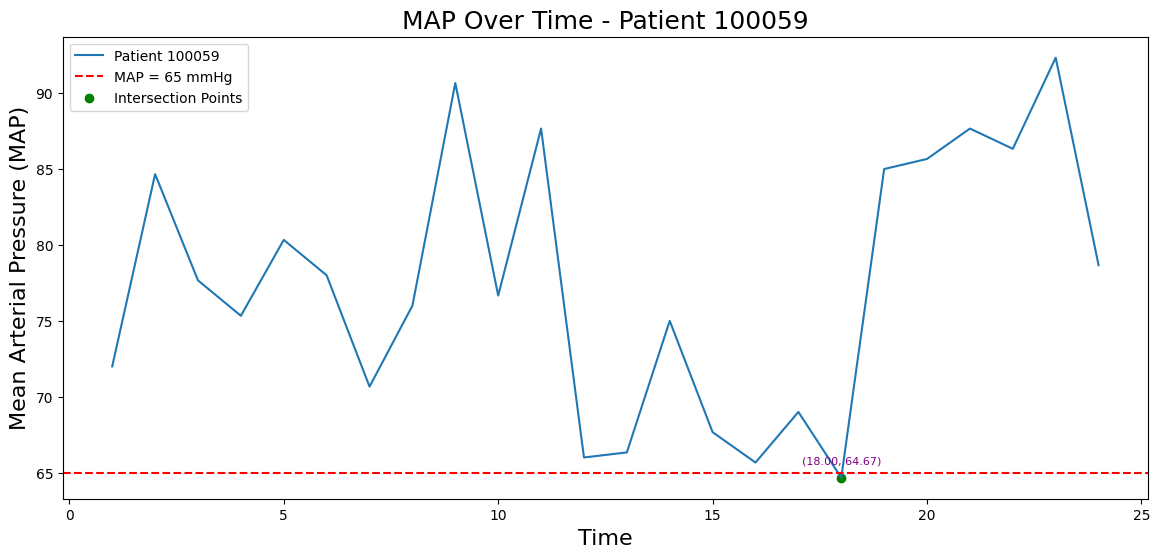

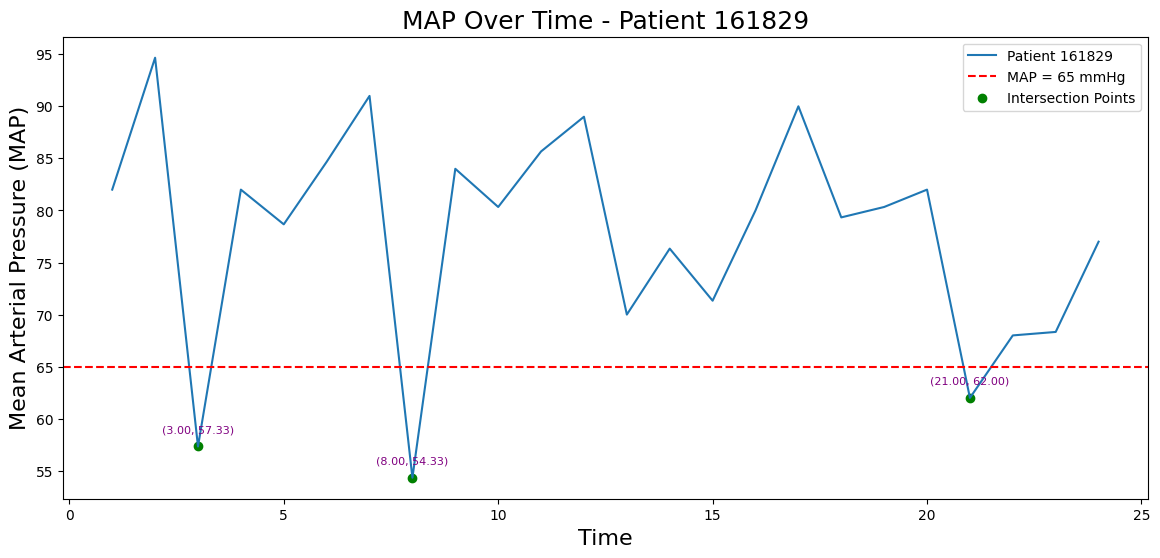

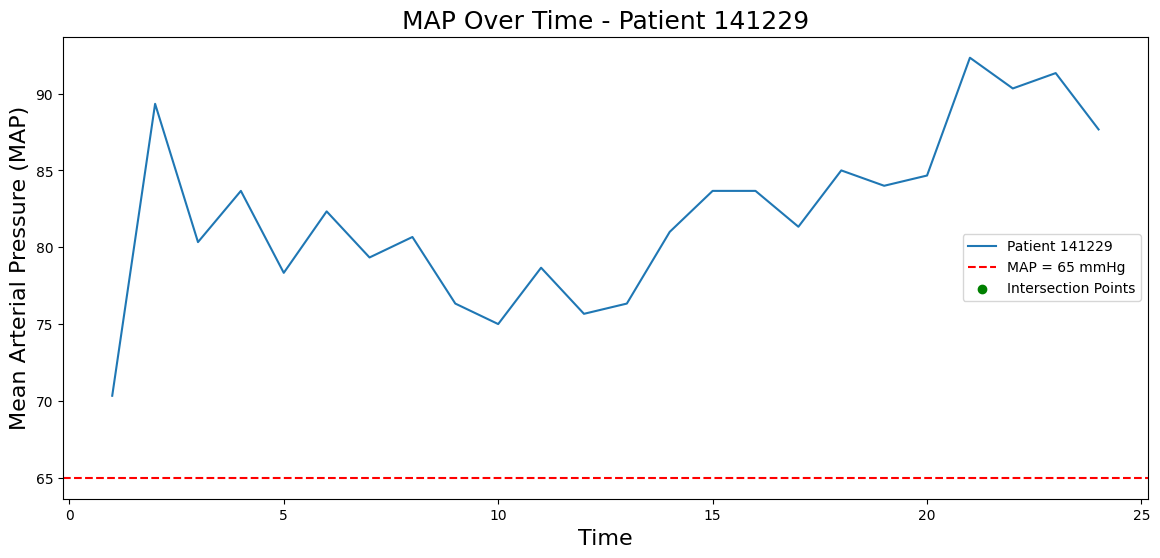

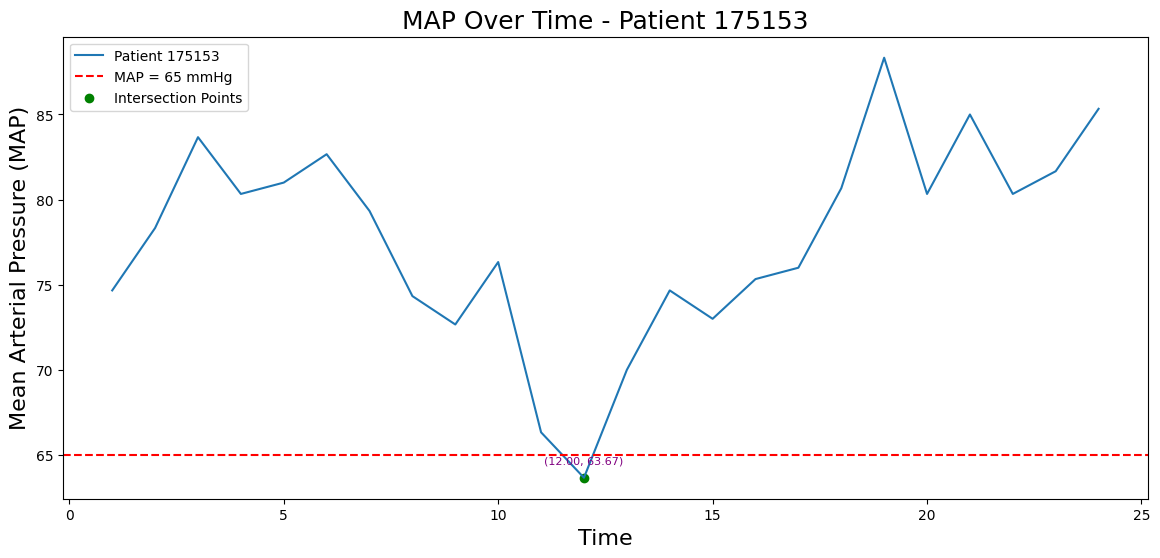

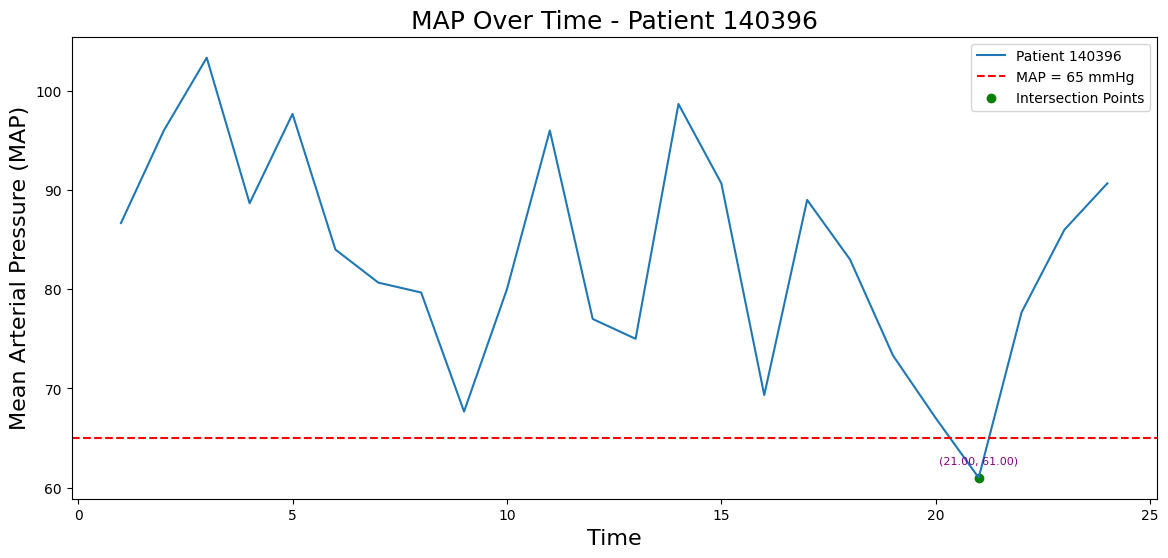

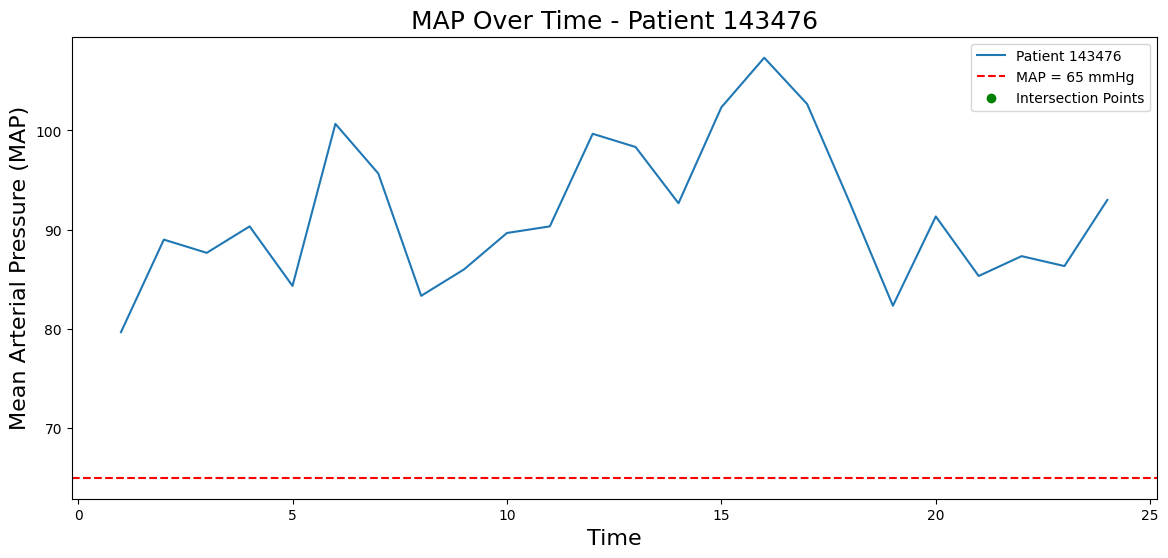

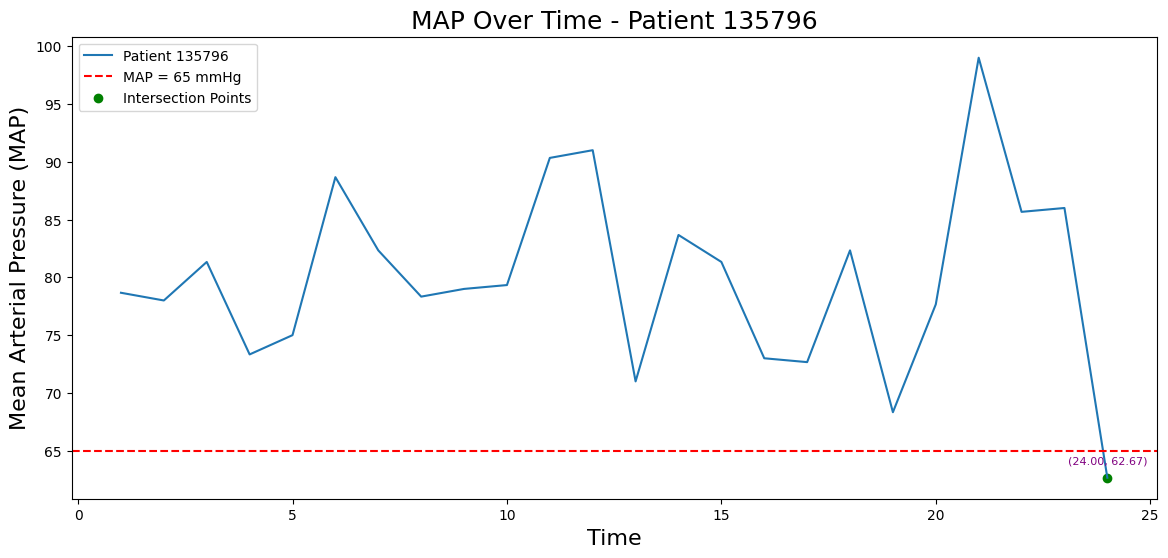

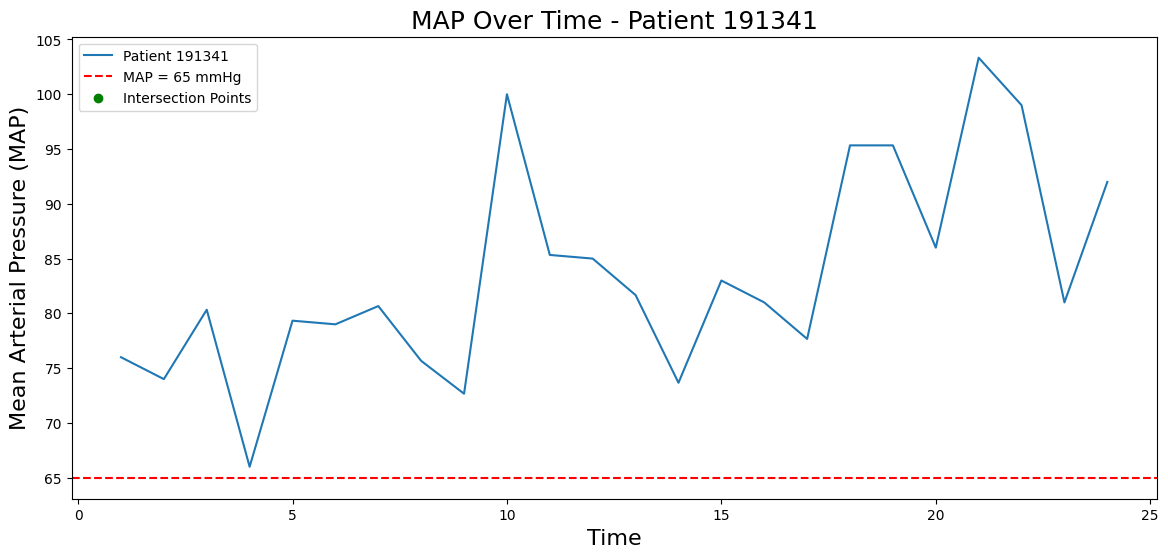

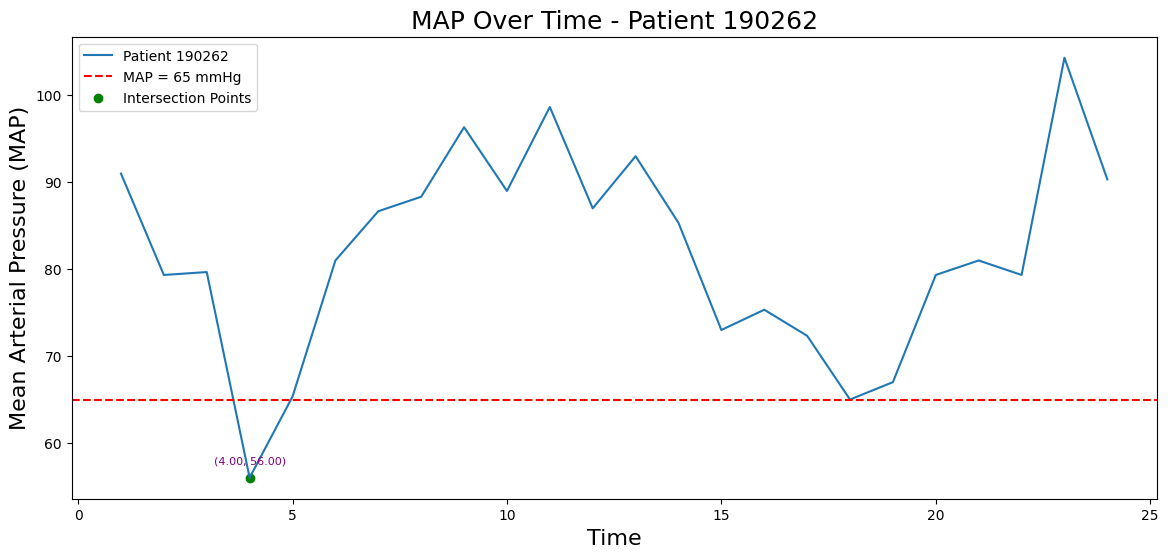

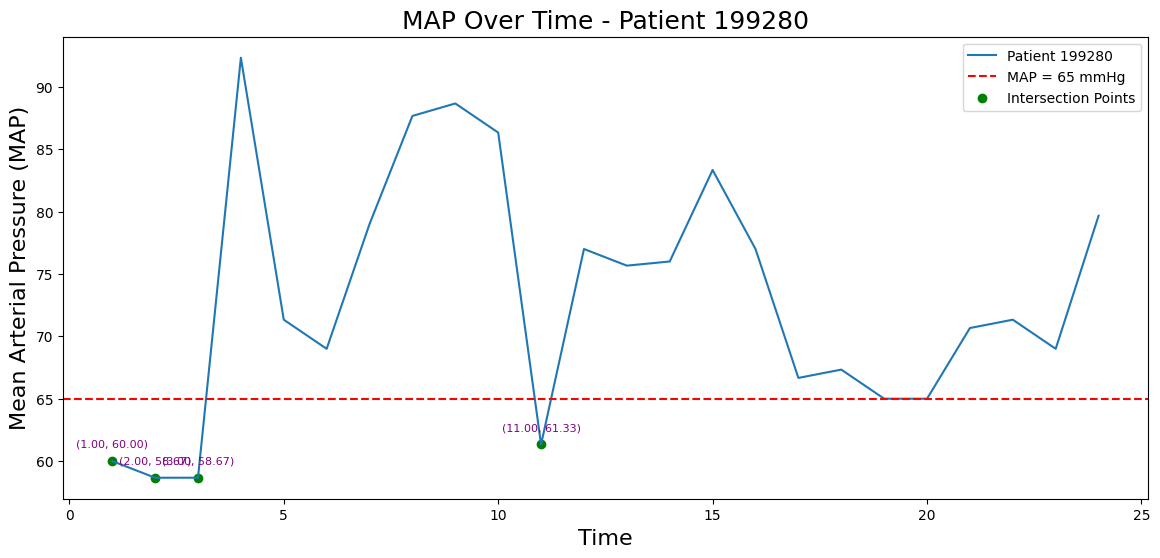

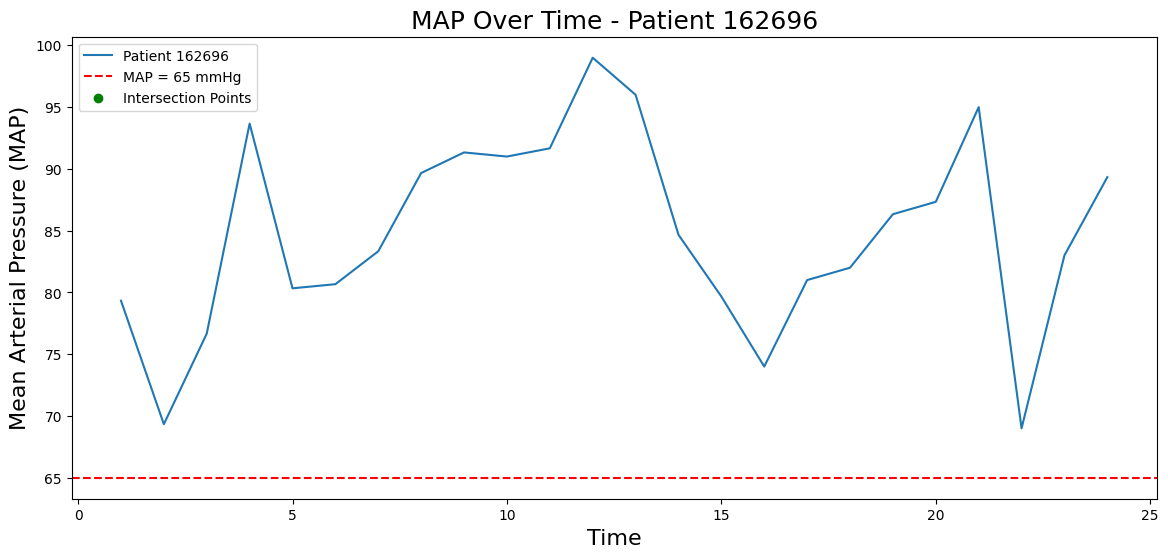

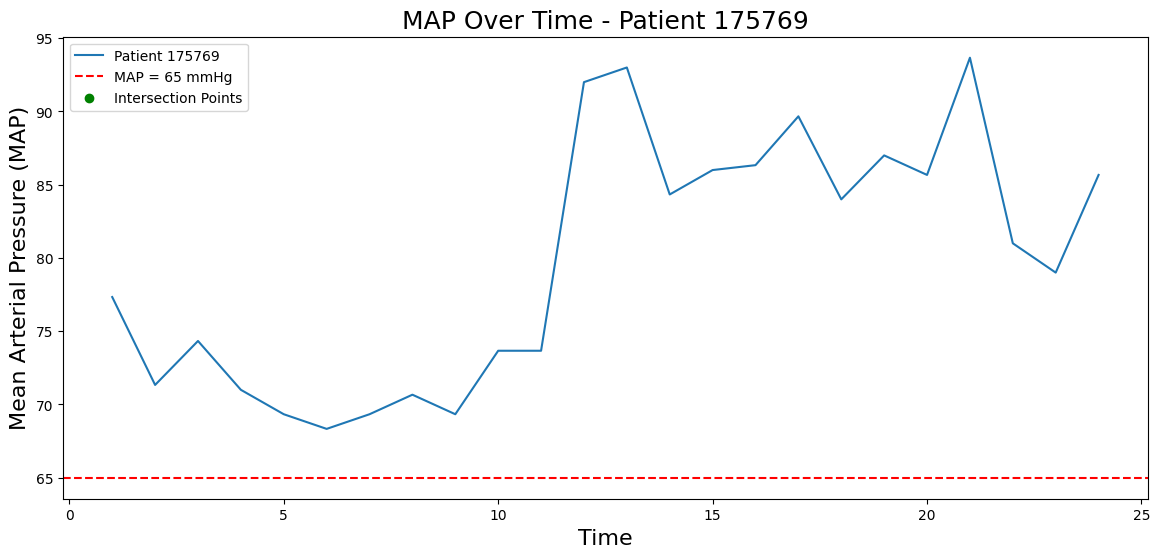

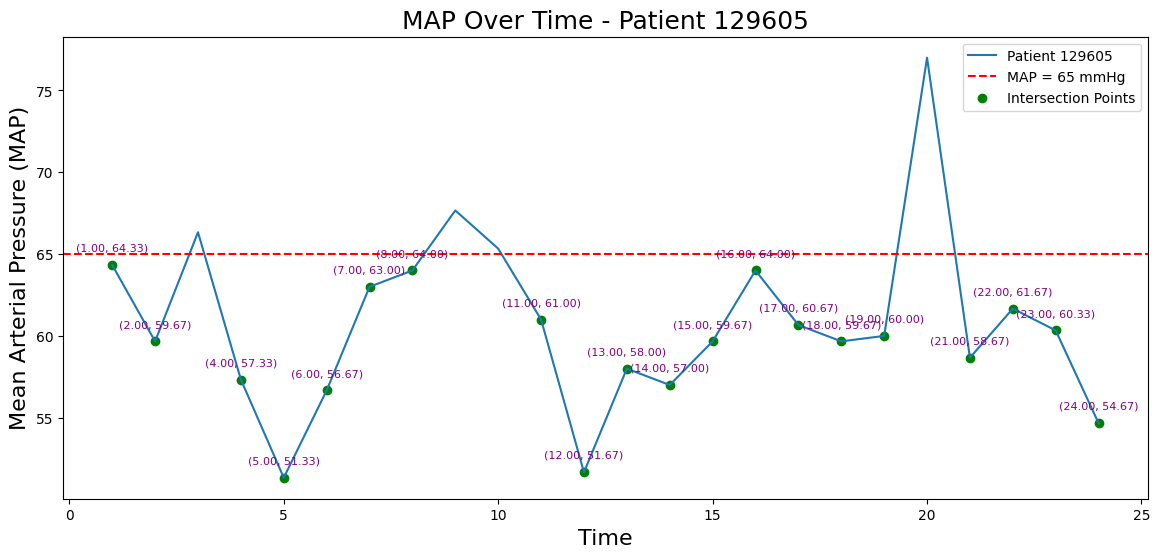

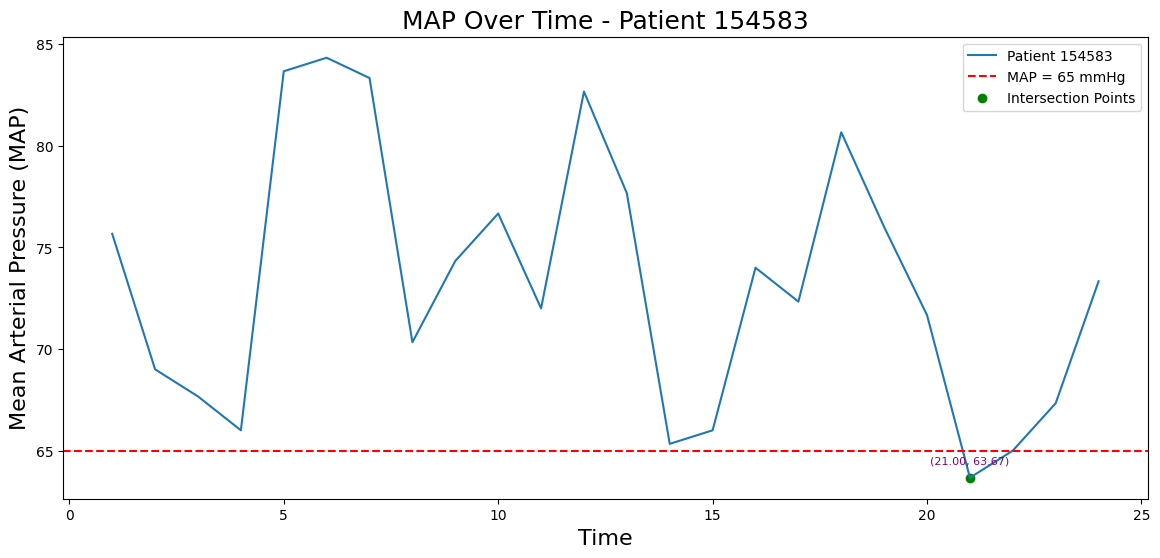

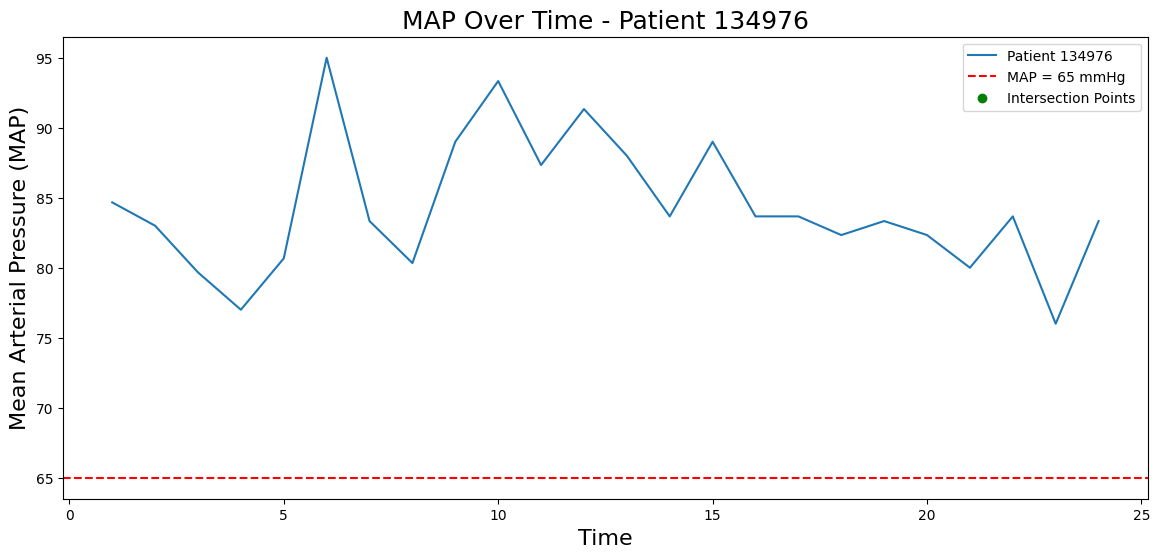

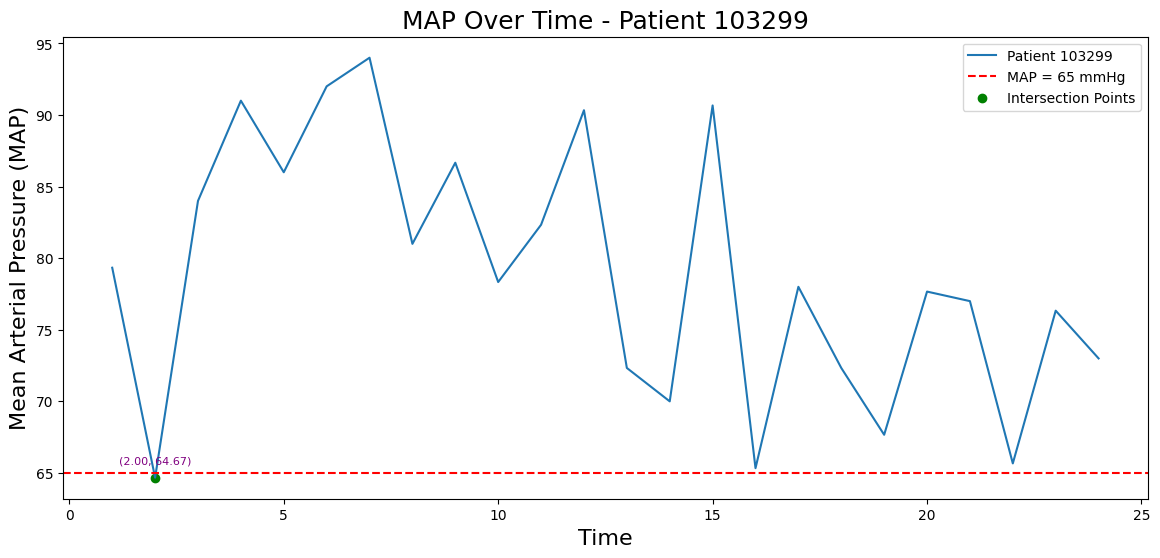

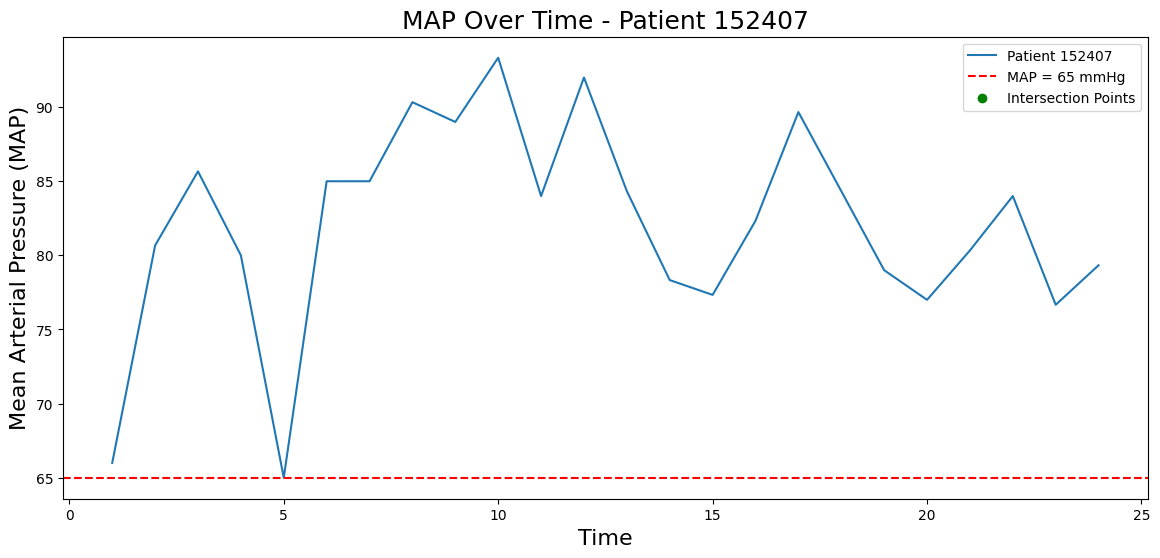

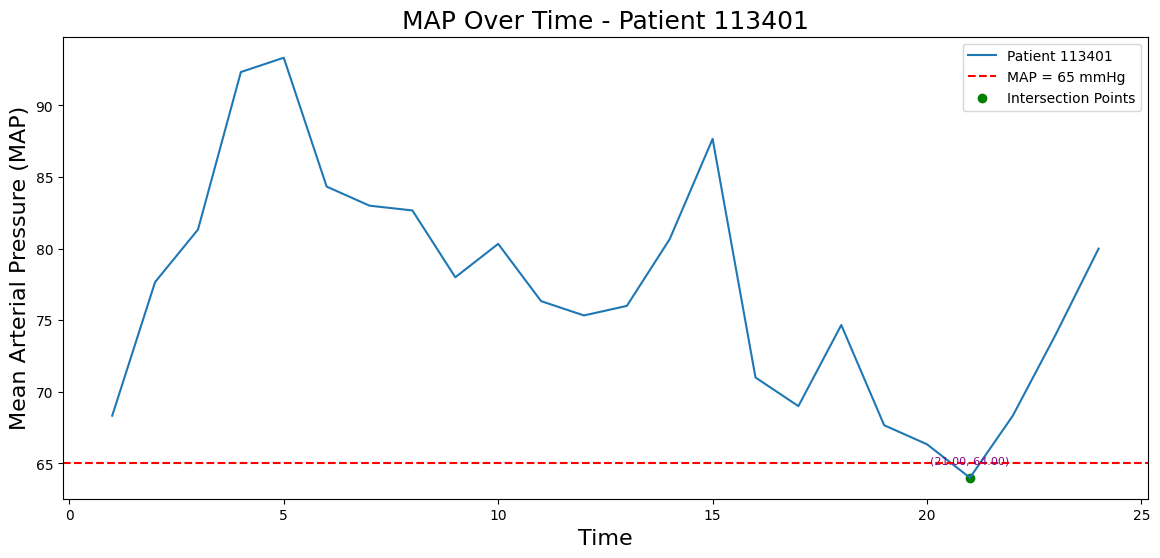

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# randomly select 25 patients for plotting
selected_patients = df_filtered['PatientID'].sample(n=25, random_state=42)

# Plot MAP over time for each patient
for patient_id in selected_patients:
    # Filter data for the current patient
    patient_data = df_filtered[df_filtered['PatientID'] == patient_id]

    # Set x equal to the hours
    x_hr = patient_data['hour']

    # Set y equal to MPA
    y_map = patient_data['map']

    # Plot time against MAP for each patient
    plt.figure(figsize=(14, 6))
    plt.plot(x_hr, y_map, label=f'Patient {patient_id}')

    # a horizontal line at 65 mmHg
    plt.axhline(y=65, color='red', linestyle='--', label='MAP = 65 mmHg')

  #Find intersection points
    intersection_indices = np.where(y_map<65)
    intersection_points_x = x_hr.iloc[intersection_indices]
    intersection_points_y = y_map.iloc[intersection_indices]

    # Highlight the intersection points
    plt.scatter(intersection_points_x, intersection_points_y, color='green', label='Intersection Points')
    #annotate intersection points
    for x, y in zip(intersection_points_x, intersection_points_y):
        plt.annotate(f'({x:.2f}, {y:.2f})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='purple')


    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Mean Arterial Pressure (MAP)', fontsize=16)
    plt.title(f'MAP Over Time - Patient {patient_id}', fontsize=18)
    plt.legend()
    plt.show()


In [ ]:
df_filtered

,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C,map,hour
48,129669,0,106.0,85.0,156.0,19.0,NaN,NaN,NaN,106.0,NaN,NaN,91.0,37.900002,108.666667,1
49,129669,0,87.0,79.0,139.0,12.0,NaN,NaN,NaN,106.0,NaN,NaN,86.0,37.900002,99.000000,2
50,129669,0,94.0,72.0,141.0,18.0,NaN,NaN,107.0,106.0,11.0,NaN,96.0,38.000000,95.000000,3
51,129669,0,95.0,74.0,142.0,11.0,NaN,NaN,NaN,104.0,NaN,NaN,95.0,38.000000,96.666667,4
52,129669,0,110.0,80.0,170.0,7.0,NaN,NaN,NaN,102.0,NaN,NaN,98.0,38.000000,110.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29395,129605,0,76.0,59.0,113.0,9.0,NaN,NaN,NaN,80.0,NaN,NaN,100.0,37.299999,77.000000,20
29396,129605,0,56.0,40.0,96.0,10.0,NaN,NaN,NaN,80.0,NaN,NaN,96.0,NaN,58.666667,21
29397,129605,0,61.0,45.0,95.0,NaN,NaN,NaN,259.0,80.0,NaN,NaN,89.0,NaN,61.666667,22
29398,129605,0,61.0,45.0,91.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,94.0,NaN,60.333333,23


In [ ]:
df

,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C,map
0,181199,0,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,NaN,105.0,NaN,NaN,NaN
1,181199,0,102.0,73.0,90.0,17.0,NaN,NaN,NaN,114.0,NaN,127.0,100.0,36.599998,78.666667
2,181199,0,78.0,57.0,130.0,9.0,NaN,NaN,169.0,116.0,NaN,NaN,100.0,36.599998,81.333333
3,181199,0,88.0,62.0,107.0,11.0,NaN,NaN,138.0,115.0,NaN,NaN,100.0,36.500000,77.000000
4,181199,0,116.0,82.0,132.0,11.0,NaN,NaN,NaN,120.0,NaN,NaN,100.0,36.500000,98.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29443,125742,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29444,125742,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29445,125742,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29446,125742,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
unique_patient_ids = df['PatientID'].unique()
# This is where we will store the aggregated variabesl
aggregated_df = pd.DataFrame()

for patient_id in unique_patient_ids:
  #Selecting first 24 hours
  patient_data = df[df['PatientID']== patient_id].head(24)


  aggregated_data ={
      'minimum CVP' : patient_data['Centralvenouspressure '].min(skipna=True),
      'minimum daily weight': patient_data['DailyWeight'].min(skipna=True),
      'minimum glucose': patient_data['Glucose'].min(skipna=True),
      'maximum creatinine': patient_data['Creatinine'].max(skipna=True),
      'maximum haemoglobin': patient_data['Haemoglobin'].max(skipna=True),
      'maximum heartrate': patient_data['SpO2'].max(skipna=True),
      'maximum platelets': patient_data['Platelets'].max(skipna=True),
      'maxmimum temperature': patient_data['Temperature C'].max(skipna=True),
      'mean DiasBP': patient_data['DiasBP'].mean(skipna=True),
      'mean SysBP': patient_data['SysBP'].mean(skipna=True),
      'mean meanBP': patient_data['MeanBP'].mean(skipna=True),
      'mean CVP': patient_data['Centralvenouspressure '].mean(skipna=True),
      'mortality': patient_data['Mortality'].mean(skipna=True)
  }

  #Convert the aggregated data into a dataframe
  patient_aggregated_df = pd.DataFrame(aggregated_data, index=[patient_id])

  #Append the patient's aggregated data to the main dataframe
  aggregated_df = aggregated_df.append(patient_aggregated_df)




variable: minimum CVP 
             count       mean       std  min  25%   50%   75%   max
mortality                                                         
0.0        1032.0   7.471308  4.399729  0.0  4.0   7.0  10.0  25.0
1.0          41.0  11.317073  5.217466  1.0  8.0  10.0  14.0  22.0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
variable: minimum daily weight 
            count        mean        std   min        25%        50%  \
mortality                                                             
0.0        429.0   91.598135  21.629125  29.0  76.300003  88.800003   
1.0         12.0  107.550001  41.574741  66.0  80.750000  91.400002   

                  75%         max  
mortality                          
0.0        104.199997  183.000000  
1.0        124.400002  208.199997  
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
variable: minimum glucose 
            count        mean        std   min   25%   50%    75%    max
mortality                                     

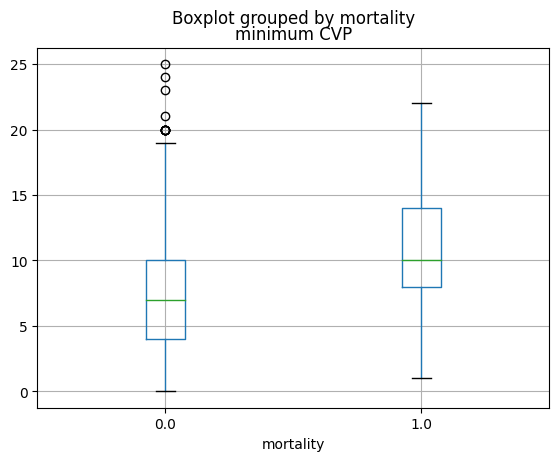

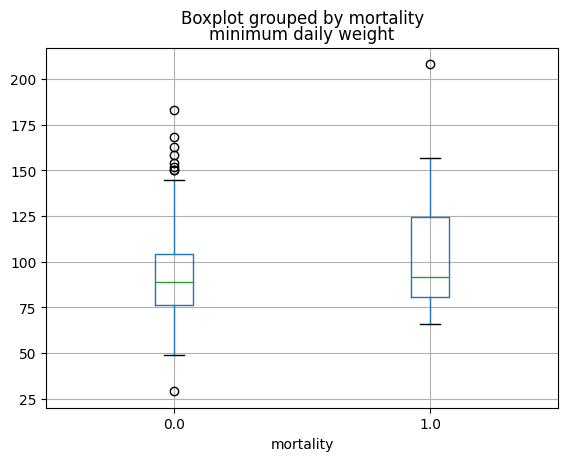

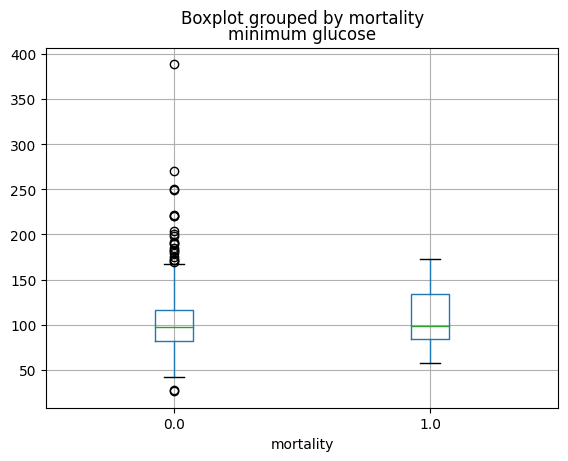

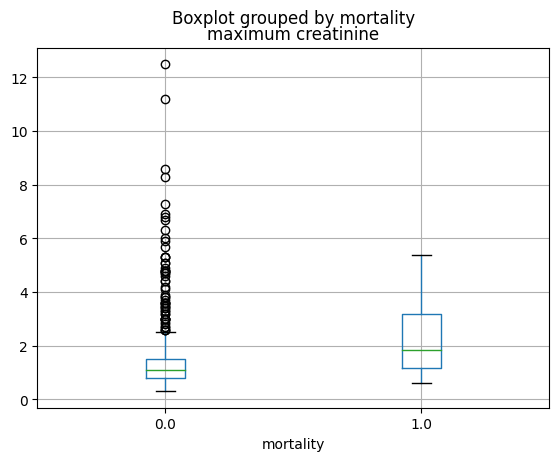

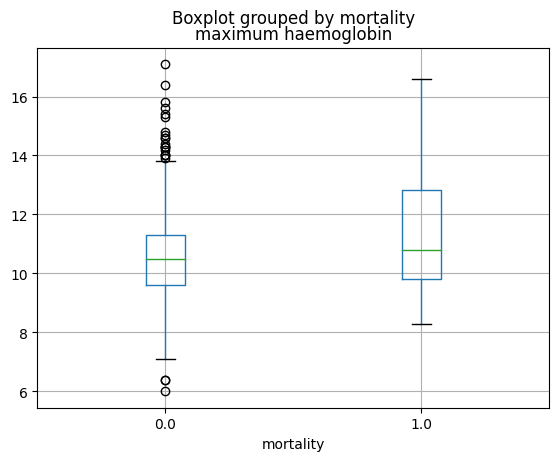

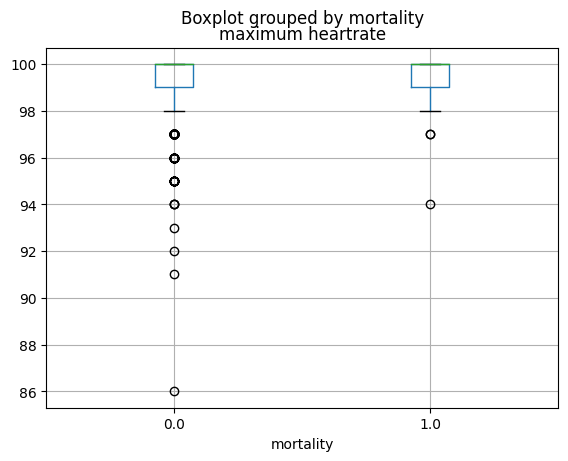

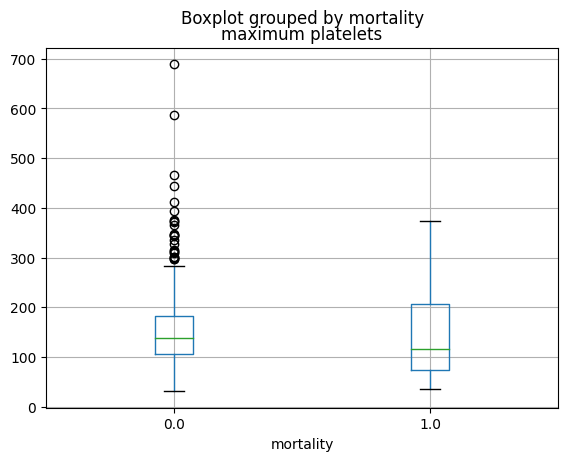

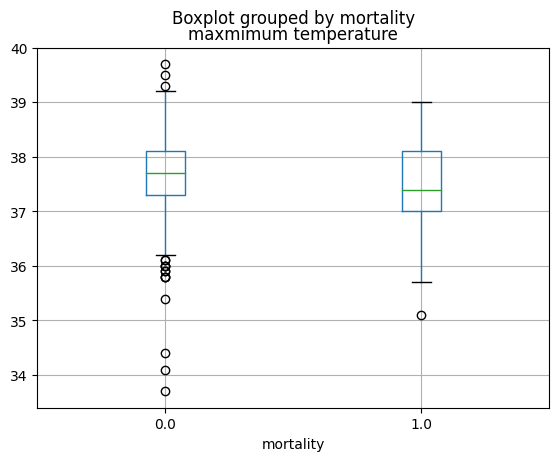

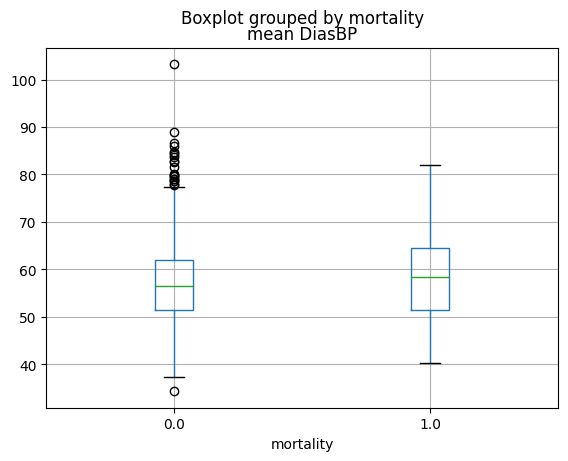

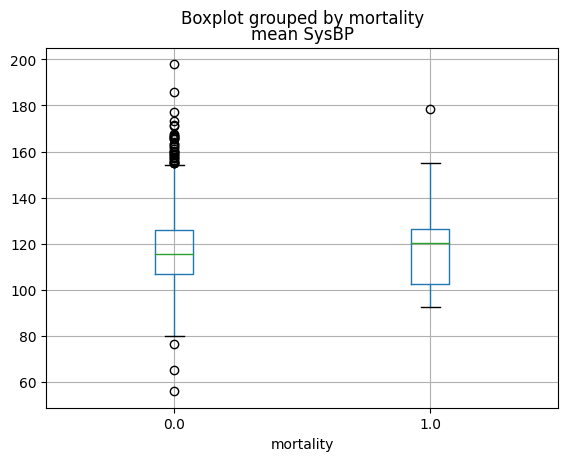

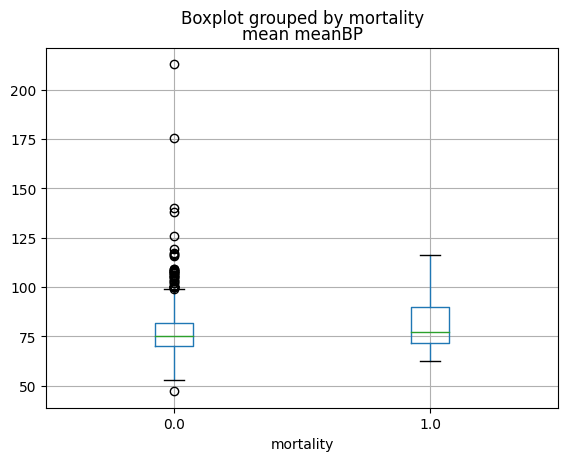

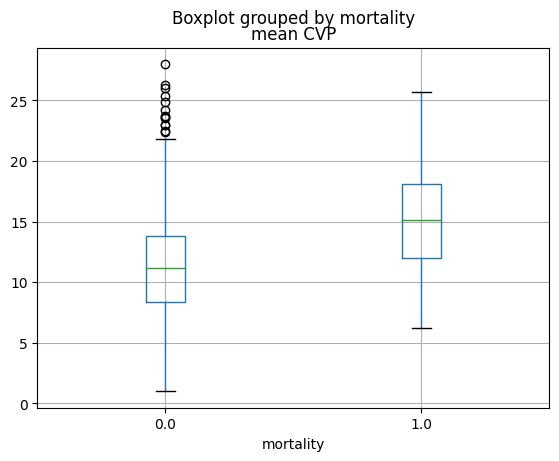

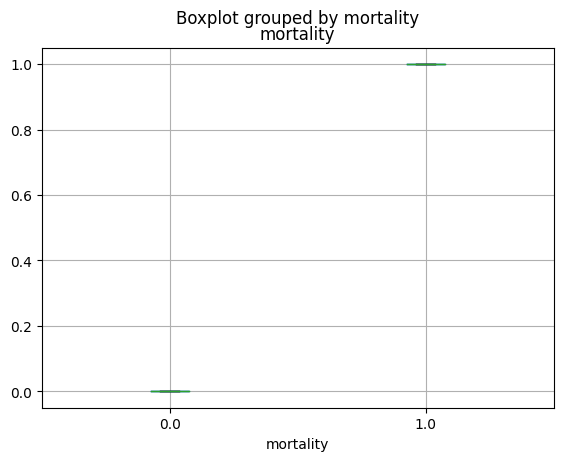

In [ ]:
for var in aggregated_df.columns:
  aggregated_df.boxplot(column=[var], by='mortality')
  print('variable:', var, '\n', aggregated_df.groupby('mortality')[var].describe())
  print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')

The above aggregation was done on data obtained from listwise deletion. There are disadvantages to this method. For instance, it can exclude a large fraction of the original sample. Therefore, it only suits when your missing data is limited to a small number of observations. Moreover it also assumes that our data is MCAR which it is not, based on our analysis.

We instead perform KNN imputation on our data followed by aggregation. This imputation method preserves variability and can handle missingness at random better compared to the former imputation method.

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed_df_knn = pd.DataFrame(imputer.fit_transform(df))
imputed_df_knn.columns = df.columns

In [ ]:
unique_patient_ids = imputed_df_knn['PatientID'].unique()
# This is where we will store the aggregated variabesl
aggregated_df_knn = pd.DataFrame()

for patient_id in unique_patient_ids:
  #Selecting first 24 hours
  patient_data = imputed_df_knn[imputed_df_knn['PatientID']== patient_id].head(24)


  aggregated_data ={
      'minimum CVP' : patient_data['Centralvenouspressure '].min(skipna=True),
      'minimum daily weight': patient_data['DailyWeight'].min(skipna=True),
      'minimum glucose': patient_data['Glucose'].min(skipna=True),
      'maximum creatinine': patient_data['Creatinine'].max(skipna=True),
      'maximum haemoglobin': patient_data['Haemoglobin'].max(skipna=True),
      'maximum heartrate': patient_data['SpO2'].max(skipna=True),
      'maximum platelets': patient_data['Platelets'].max(skipna=True),
      'maxmimum temperature': patient_data['Temperature C'].max(skipna=True),
      'mean DiasBP': patient_data['DiasBP'].mean(skipna=True),
      'mean SysBP': patient_data['SysBP'].mean(skipna=True),
      'mean meanBP': patient_data['MeanBP'].mean(skipna=True),
      'mean CVP': patient_data['Centralvenouspressure '].mean(skipna=True),
      'mortality': patient_data['Mortality'].mean(skipna=True)
  }

  #Convert the aggregated data into a dataframe
  patient_aggregated_df = pd.DataFrame(aggregated_data, index=[patient_id])

  #Append the patient's aggregated data to the main dataframe
  aggregated_df_knn = aggregated_df_knn.append(patient_aggregated_df)

In [ ]:
imputed_df_knn

,PatientID,Mortality,MeanBP,DiasBP,SysBP,Centralvenouspressure,Creatinine,DailyWeight,Glucose,HeartRate,Haemoglobin,Platelets,SpO2,Temperature C,map
0,181199.0,0.0,93.0,67.0,126.0,13.0,1.15,72.549999,205.0,114.5,11.95,105.0,99.0,37.150000,86.666667
1,181199.0,0.0,102.0,73.0,90.0,17.0,1.15,72.549999,110.0,114.0,11.05,127.0,100.0,36.599998,78.666667
2,181199.0,0.0,78.0,57.0,130.0,9.0,1.00,72.549999,169.0,116.0,11.95,133.0,100.0,36.599998,81.333333
3,181199.0,0.0,88.0,62.0,107.0,11.0,1.00,72.549999,138.0,115.0,10.90,158.0,100.0,36.500000,77.000000
4,181199.0,0.0,116.0,82.0,132.0,11.0,1.00,79.950001,146.0,120.0,11.95,91.0,100.0,36.500000,98.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29443,125742.0,0.0,76.0,55.0,123.5,22.0,1.30,157.549999,136.0,91.0,11.00,172.0,94.5,37.350000,77.833333
29444,125742.0,0.0,76.0,55.0,123.5,22.0,1.30,157.549999,136.0,91.0,11.00,172.0,94.5,37.350000,77.833333
29445,125742.0,0.0,76.0,55.0,123.5,22.0,1.30,157.549999,136.0,91.0,11.00,172.0,94.5,37.350000,77.833333
29446,125742.0,0.0,76.0,55.0,123.5,22.0,1.30,157.549999,136.0,91.0,11.00,172.0,94.5,37.350000,77.833333


Overall, there is less variability in distribution of aggregated variables compared to their individual distributions (for eg., SysBP has a min value of 6 and max value of 227 for outcome class 0 with SD 21 whereas meanSysBP (both complete case and KNN imputed)  has min and max values 65 and 196 with SD of 16.08). The differences in mean of the distributions between outcome classes remain consistent when individual distributions are translated to aggregated distributions. For eg.,  temperature has a mean value of 37.32 and 37.02 for outcome class 0 and 1 respectively. This relationship (class 0’s temperature > class 1’s) is preserved when aggregated (mean max value of 37.72 and 37.51 for classes 0 and 1 respectively). Moreover, aggregated distributions reduced the dimensionality of the data, making box plot and summary stats table easier to interpret.

When comparing aggregated distibutions calculated on KNN vs list-wise deleted data, it is observed that the overall trend indicates that though both preserve the trends of the original individual distributions, the former's distributions are less variable compared to latter. One possible reason could be because KNN smooths out missing values by predicting them based on values of nearest neighbours, therefore, reducing overall variability of the data.

variable: minimum CVP 
             count       mean       std  min  25%   50%   75%   max
mortality                                                         
0.0        1077.0   7.371300  4.287172  0.0  4.0   7.0  10.0  27.0
1.0          49.0  11.295918  5.120342  1.0  8.0  10.5  14.0  22.0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
variable: minimum daily weight 
             count       mean        std        min        25%        50%  \
mortality                                                                  
0.0        1077.0  89.068245  17.010679  29.000000  77.750000  86.650002   
1.0          49.0  94.853062  22.248439  62.600002  81.299999  90.000000   

                  75%         max  
mortality                          
0.0         99.250000  157.549999  
1.0        107.149998  157.549999  
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
variable: minimum glucose 
             count        mean        std   min   25%    50%    75%    max
mortality               

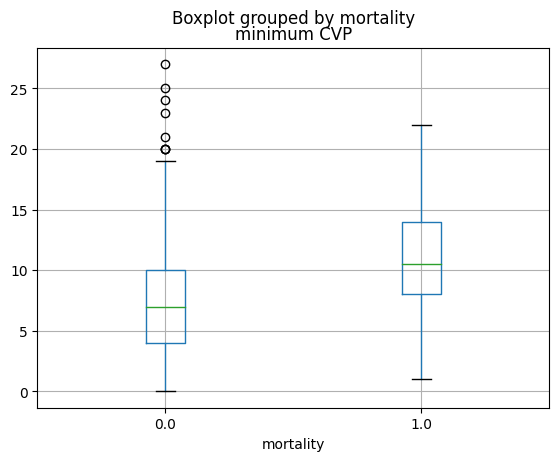

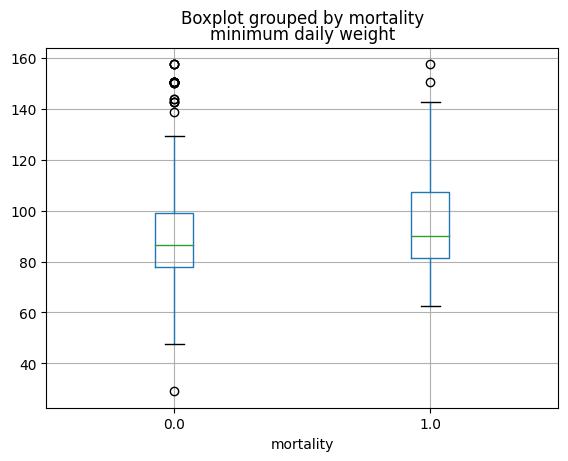

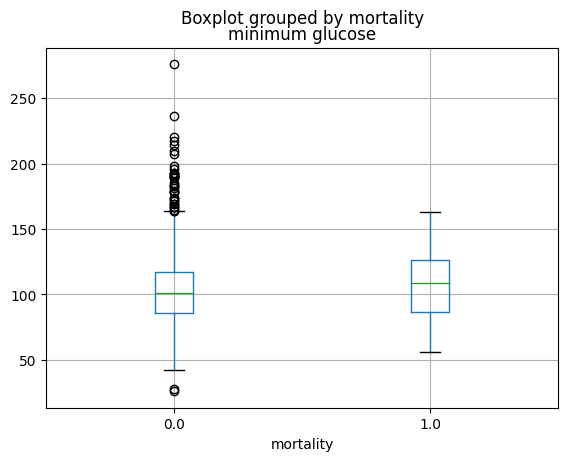

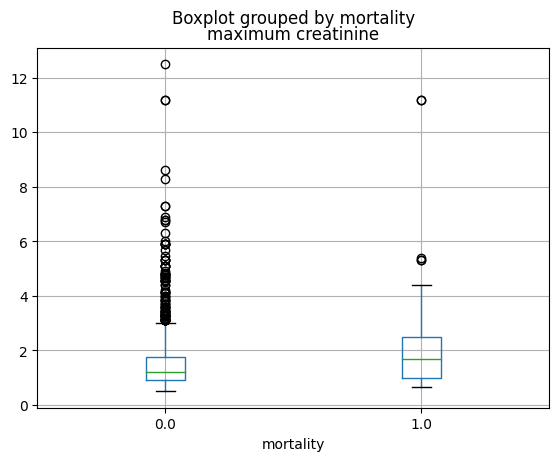

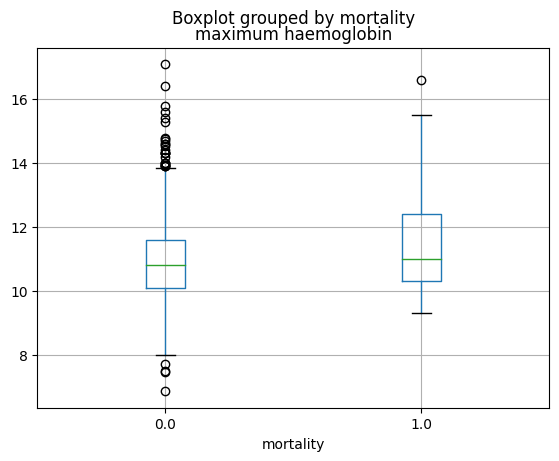

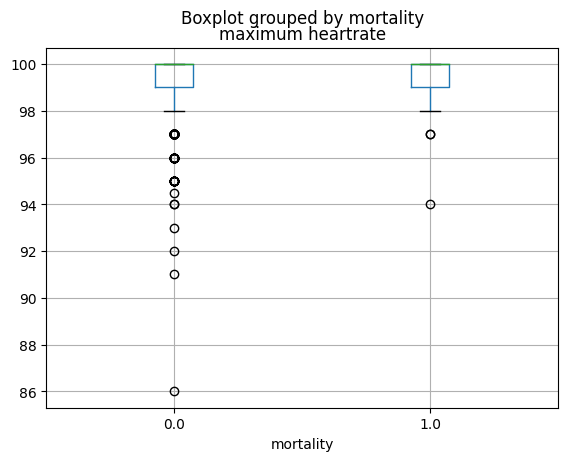

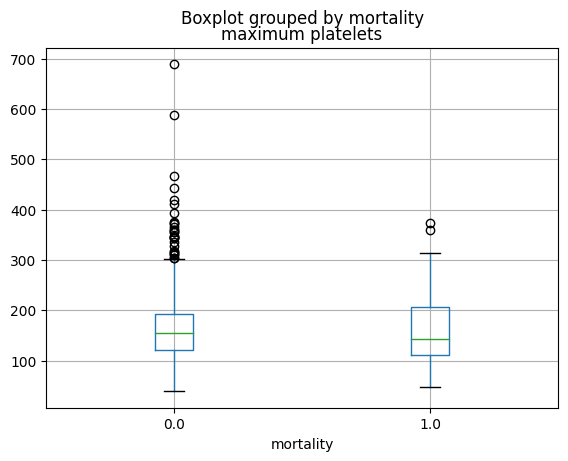

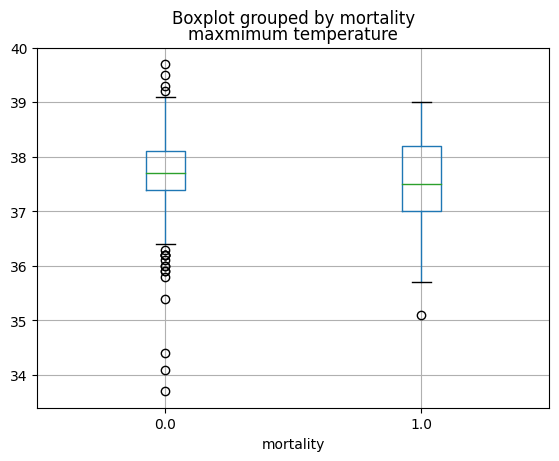

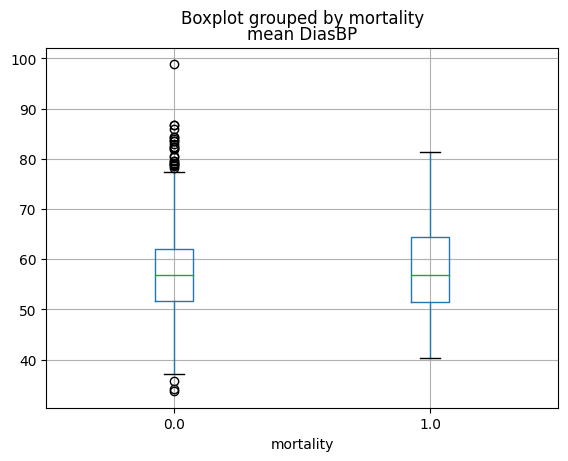

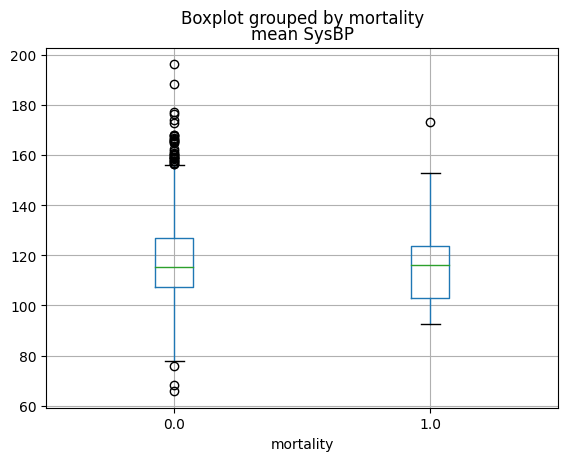

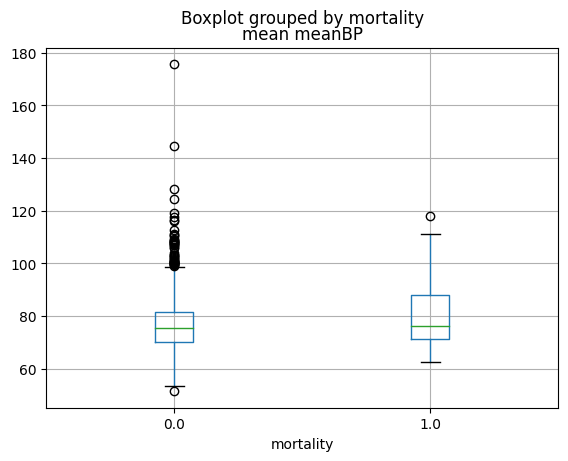

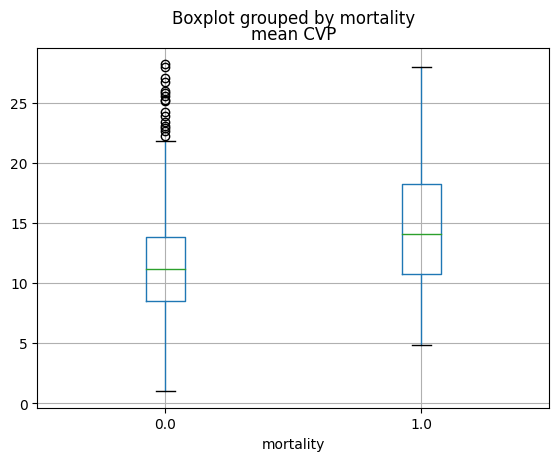

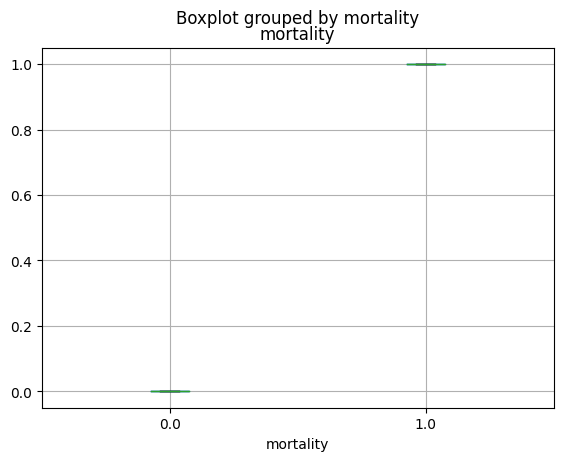

In [ ]:
for var in aggregated_df_knn.columns:
  aggregated_df_knn.boxplot(column=[var], by='mortality')
  print('variable:', var, '\n',aggregated_df_knn.groupby('mortality')[var].describe())
  print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')